<a href="https://colab.research.google.com/github/Abdulibraheem/Abdulibraheem.github.io/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import ast
import csv
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("transactionshistory.csv")

df.head()

Saving transactionshistory.csv to transactionshistory.csv


,id,amount_recieved,created_at,updated_at,recipient_id,sender_id,receive_currency_id,send_currency_id,amount_sent,status,transaction_id,description,requires_review
0,18831,39950.00,2025-03-23 15:19:36.689756+00,2025-03-23 15:19:36.689763+00,3538,1780,2,4,23.5,Cancelled,18850,NaN,f
1,18860,10075.00,2025-03-24 08:24:46.160616+00,2025-03-24 08:24:46.160644+00,3142,2764,2,1,5.0,Successful,18879,NaN,f
2,696,1.00,2024-07-10 15:18:37.533344+00,2024-07-10 15:18:37.533359+00,359,495,1,2,2000.0,Cancelled,659,NaN,f
3,83,0.01,2024-01-24 07:59:59.110505+00,2024-01-24 07:59:59.110522+00,52,1,1,2,10.0,Pending,20,NaN,f
4,84,0.01,2024-01-24 08:50:43.344997+00,2024-01-24 08:50:43.345017+00,52,1,1,2,10.0,Pending,21,NaN,f


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5758 non-null   int64  
 1   amount_recieved      5758 non-null   float64
 2   created_at           5758 non-null   object 
 3   updated_at           5758 non-null   object 
 4   recipient_id         5758 non-null   int64  
 5   sender_id            5758 non-null   int64  
 6   receive_currency_id  5758 non-null   int64  
 7   send_currency_id     5758 non-null   int64  
 8   amount_sent          5758 non-null   float64
 9   status               5758 non-null   object 
 10  transaction_id       5758 non-null   int64  
 11  description          0 non-null      float64
 12  requires_review      5758 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 584.9+ KB


(5758, 13)

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])   # parse including timezone

df['created_at'] = df['created_at'].dt.tz_localize(None).dt.floor('s')  # remove timezone info

df['updated_at'] = pd.to_datetime(df['updated_at'])   # parse including timezone

df['updated_at'] = df['updated_at'].dt.tz_localize(None).dt.floor('s')  # remove timezone info

df

,id,amount_recieved,created_at,updated_at,recipient_id,sender_id,receive_currency_id,send_currency_id,amount_sent,status,transaction_id,description,requires_review
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,2,4,23.50,Cancelled,18850,NaN,f
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,2,1,5.00,Successful,18879,NaN,f
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,1,2,2000.00,Cancelled,659,NaN,f
3,83,0.01,2024-01-24 07:59:59,2024-01-24 07:59:59,52,1,1,2,10.00,Pending,20,NaN,f
4,84,0.01,2024-01-24 08:50:43,2024-01-24 08:50:43,52,1,1,2,10.00,Pending,21,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,22488,50003.63,2025-06-09 20:58:26,2025-06-09 20:58:26,6904,3225,2,1,23.29,Successful,22507,NaN,f
5754,22489,250018.15,2025-06-09 21:00:31,2025-06-09 21:00:31,9518,4017,2,1,116.45,Successful,22508,NaN,f
5755,22490,70013.67,2025-06-09 21:06:33,2025-06-09 21:06:33,3505,3225,2,1,32.61,Successful,22509,NaN,f
5756,22491,300000.31,2025-06-09 21:09:33,2025-06-09 21:09:33,9454,4017,2,1,139.73,Successful,22510,NaN,f


In [5]:
cols = [ 'receive_currency_id', 'send_currency_id']

currency_dict = {1: "GBP", 2: "NGN", 4: "EUR", 5: "USD"}

df['receive_currency_id'] = df['receive_currency_id'].map(currency_dict)

df['send_currency_id'] = df['send_currency_id'].map(currency_dict)

df

,id,amount_recieved,created_at,updated_at,recipient_id,sender_id,receive_currency_id,send_currency_id,amount_sent,status,transaction_id,description,requires_review
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,NGN,EUR,23.50,Cancelled,18850,NaN,f
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,NGN,GBP,5.00,Successful,18879,NaN,f
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,GBP,NGN,2000.00,Cancelled,659,NaN,f
3,83,0.01,2024-01-24 07:59:59,2024-01-24 07:59:59,52,1,GBP,NGN,10.00,Pending,20,NaN,f
4,84,0.01,2024-01-24 08:50:43,2024-01-24 08:50:43,52,1,GBP,NGN,10.00,Pending,21,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,22488,50003.63,2025-06-09 20:58:26,2025-06-09 20:58:26,6904,3225,NGN,GBP,23.29,Successful,22507,NaN,f
5754,22489,250018.15,2025-06-09 21:00:31,2025-06-09 21:00:31,9518,4017,NGN,GBP,116.45,Successful,22508,NaN,f
5755,22490,70013.67,2025-06-09 21:06:33,2025-06-09 21:06:33,3505,3225,NGN,GBP,32.61,Successful,22509,NaN,f
5756,22491,300000.31,2025-06-09 21:09:33,2025-06-09 21:09:33,9454,4017,NGN,GBP,139.73,Successful,22510,NaN,f


In [6]:
# checking the Null values
Null_values=df.isnull().sum()
print(Null_values)

id                        0
amount_recieved           0
created_at                0
updated_at                0
recipient_id              0
sender_id                 0
receive_currency_id       0
send_currency_id          0
amount_sent               0
status                    0
transaction_id            0
description            5758
requires_review           0
dtype: int64


In [7]:
df.describe(include='all')

,id,amount_recieved,created_at,updated_at,recipient_id,sender_id,receive_currency_id,send_currency_id,amount_sent,status,transaction_id,description,requires_review
count,5758.000000,5.758000e+03,5758,5758,5758.000000,5758.000000,5758,5758,5.758000e+03,5758,5758.000000,0.0,5758
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,6,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NGN,GBP,NaN,Successful,NaN,NaN,f
freq,NaN,NaN,NaN,NaN,NaN,NaN,5138,5073,NaN,4588,NaN,NaN,5758
mean,14318.626780,3.470602e+05,2025-03-23 00:51:05.829454336,2025-03-23 00:51:05.829454336,4707.825808,2936.146231,NaN,NaN,1.821312e+05,NaN,14338.966481,NaN,NaN
min,83.000000,0.000000e+00,2024-01-24 07:59:59,2024-01-24 07:59:59,52.000000,1.000000,NaN,NaN,1.000000e+00,NaN,20.000000,NaN,NaN
25%,2602.250000,1.500965e+04,2025-02-21 10:55:08.249999872,2025-02-21 10:55:08.249999872,783.250000,892.000000,NaN,NaN,1.439500e+01,NaN,2621.250000,NaN,NaN
50%,19544.500000,7.136150e+04,2025-04-09 12:08:25.500000,2025-04-09 12:08:25.500000,3439.000000,2014.000000,NaN,NaN,5.100000e+01,NaN,19563.500000,NaN,NaN
75%,21038.750000,2.200000e+05,2025-05-14 02:01:33.500000,2025-05-14 02:01:33.500000,9356.000000,4775.000000,NaN,NaN,2.400000e+02,NaN,21057.750000,NaN,NaN
max,22492.000000,8.254047e+07,2025-06-09 21:52:19,2025-06-09 21:52:19,10027.000000,7771.000000,NaN,NaN,1.000000e+07,NaN,22511.000000,NaN,NaN


In [8]:
df = df.drop(columns=['description','requires_review'])

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['id'].isnull().sum()

np.int64(0)

In [11]:
df['created_at'].min(), df['created_at'].max()

(Timestamp('2024-01-24 07:59:59'), Timestamp('2025-06-09 21:52:19'))

In [12]:
df['updated_at'].min(), df['updated_at'].max()

(Timestamp('2024-01-24 07:59:59'), Timestamp('2025-06-09 21:52:19'))

In [13]:
df.rename(columns = {
    'sender_id': 'Sender_id',
    'status': 'Transaction_Status',
    'created_at': 'Transaction_Created_At',
    'receive_currency_id': 'receive_currency',
    'send_currency_id': 'send_currency'
}, inplace=True)

df

,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,transaction_id
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,NGN,EUR,23.50,Cancelled,18850
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,NGN,GBP,5.00,Successful,18879
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,GBP,NGN,2000.00,Cancelled,659
3,83,0.01,2024-01-24 07:59:59,2024-01-24 07:59:59,52,1,GBP,NGN,10.00,Pending,20
4,84,0.01,2024-01-24 08:50:43,2024-01-24 08:50:43,52,1,GBP,NGN,10.00,Pending,21
...,...,...,...,...,...,...,...,...,...,...,...
5753,22488,50003.63,2025-06-09 20:58:26,2025-06-09 20:58:26,6904,3225,NGN,GBP,23.29,Successful,22507
5754,22489,250018.15,2025-06-09 21:00:31,2025-06-09 21:00:31,9518,4017,NGN,GBP,116.45,Successful,22508
5755,22490,70013.67,2025-06-09 21:06:33,2025-06-09 21:06:33,3505,3225,NGN,GBP,32.61,Successful,22509
5756,22491,300000.31,2025-06-09 21:09:33,2025-06-09 21:09:33,9454,4017,NGN,GBP,139.73,Successful,22510


In [14]:
df = df[df['Transaction_Status'].isin(['Successful', 'Cancelled'])]


df1 = df.copy()

df1['Sender_id'].nunique()


349


VOLUME & VALUE PATTERN ANALYSIS


/tmp/ipython-input-2861155857.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot(status_data, labels=df1['Transaction_Status'].unique())


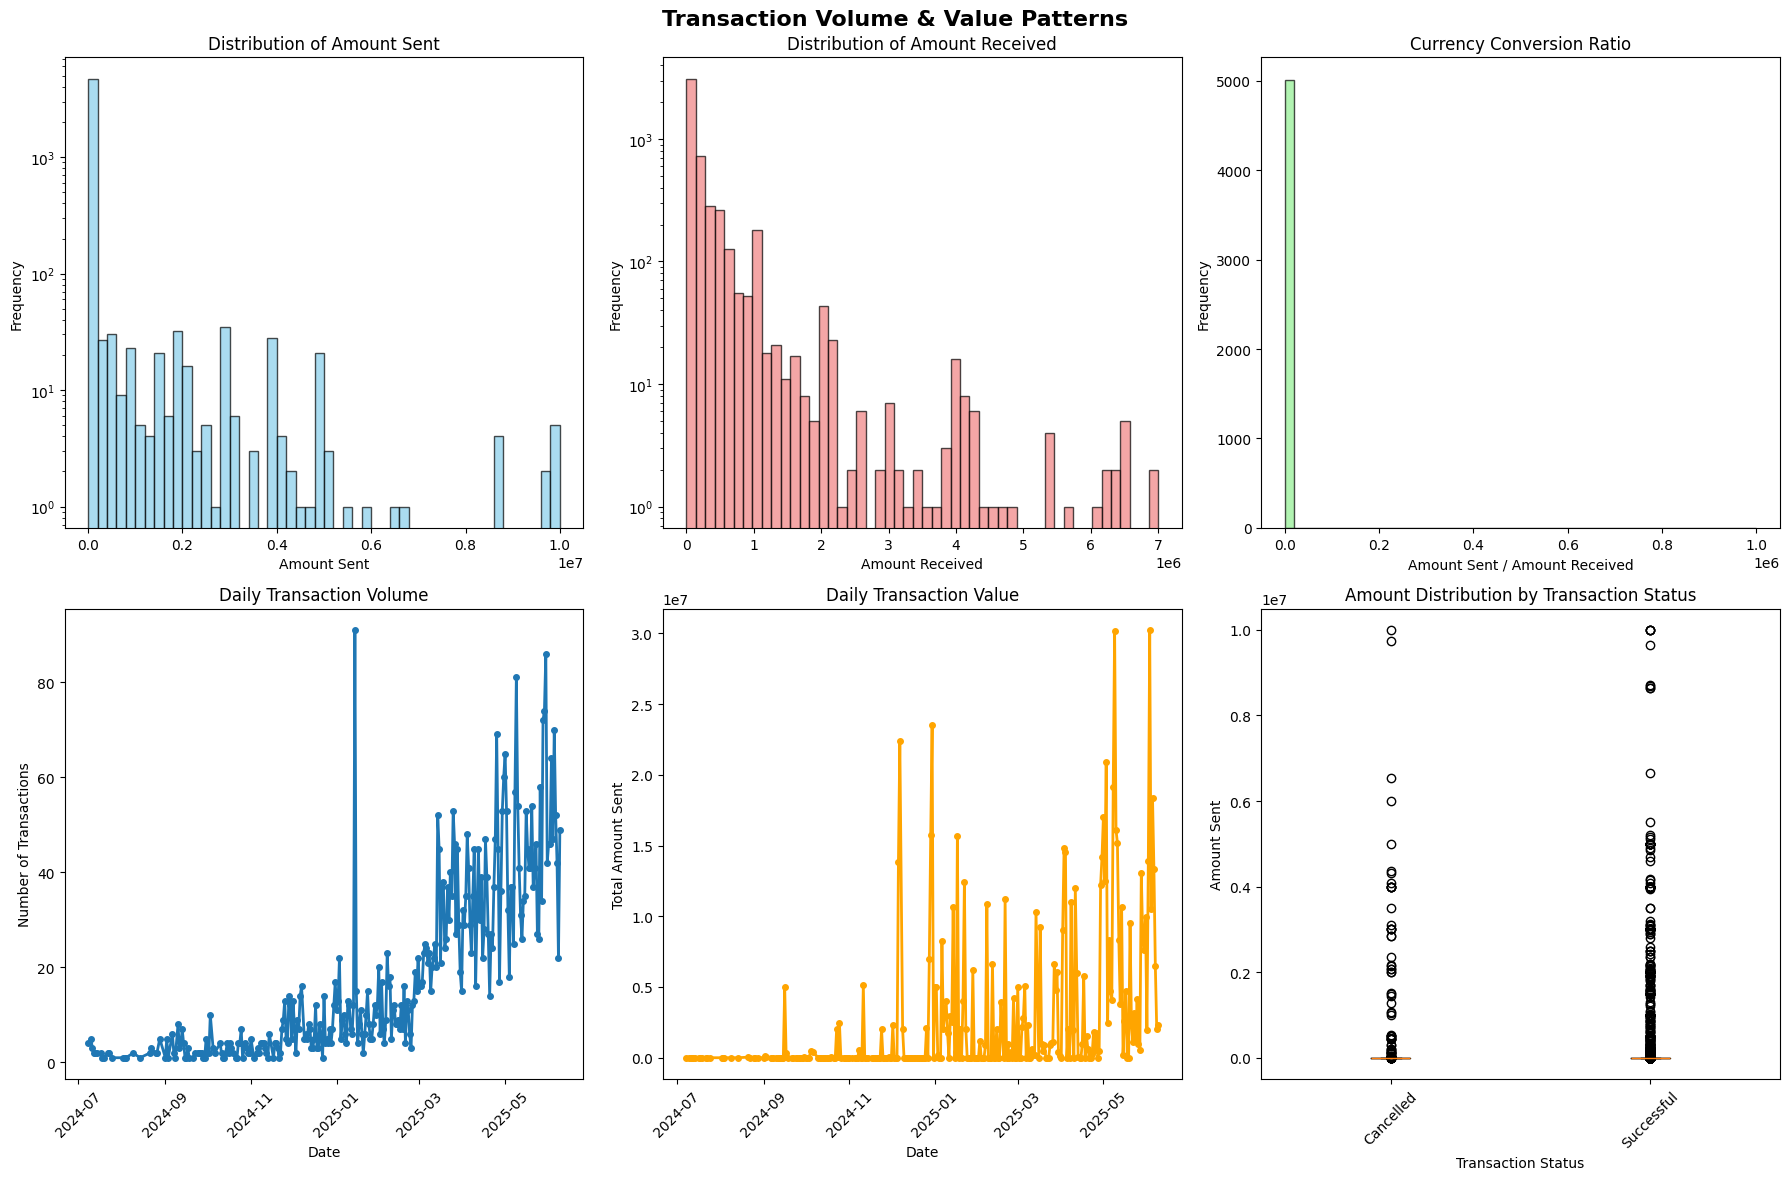


VOLUME SUMMARY:
Total Transactions: 5,012
Average Daily Volume: 17.5 transactions
Peak Daily Volume: 91 transactions
Lowest Daily Volume: 1 transactions

VALUE SUMMARY BY SEND CURRENCY:

--- Currency: EUR ---
Total Value Transacted: 2,434.40
Average Transaction: 44.26
Median Transaction: 10.00
Largest Transaction: 577.61
Smallest Transaction: 1.00

--- Currency: GBP ---
Total Value Transacted: 693,765.77
Average Transaction: 153.28
Median Transaction: 50.00
Largest Transaction: 3,510.00
Smallest Transaction: 1.00

--- Currency: NGN ---
Total Value Transacted: 759,258,197.61
Average Transaction: 1761619.95
Median Transaction: 1000000.00
Largest Transaction: 10,000,000.00
Smallest Transaction: 1.00


,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,transaction_id,conversion_ratio,date
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,NGN,EUR,23.50,Cancelled,18850,0.000588,2025-03-23
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,NGN,GBP,5.00,Successful,18879,0.000496,2025-03-24
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,GBP,NGN,2000.00,Cancelled,659,1999.998000,2024-07-10
5,18883,2.45,2025-03-24 15:10:14,2025-03-24 15:10:14,6409,5864,GBP,NGN,5000.00,Successful,18902,2040.815494,2025-03-24
6,18902,403000.00,2025-03-25 07:41:12,2025-03-25 07:41:12,786,983,NGN,GBP,200.00,Successful,18921,0.000496,2025-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,22487,40793.00,2025-06-09 20:45:14,2025-06-09 20:45:14,10027,7521,NGN,GBP,19.00,Successful,22506,0.000466,2025-06-09
5753,22488,50003.63,2025-06-09 20:58:26,2025-06-09 20:58:26,6904,3225,NGN,GBP,23.29,Successful,22507,0.000466,2025-06-09
5754,22489,250018.15,2025-06-09 21:00:31,2025-06-09 21:00:31,9518,4017,NGN,GBP,116.45,Successful,22508,0.000466,2025-06-09
5755,22490,70013.67,2025-06-09 21:06:33,2025-06-09 21:06:33,3505,3225,NGN,GBP,32.61,Successful,22509,0.000466,2025-06-09


In [15]:
def analyze_volume_value_patterns(df1):
    """
    Analyze transaction volumes and values
    """
    print("\n" + "=" * 60)
    print("VOLUME & VALUE PATTERN ANALYSIS")
    print("=" * 60)

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Transaction Volume & Value Patterns', fontsize=16, fontweight='bold')

    # 1. Amount Sent Distribution
    axes[0, 0].hist(df1['amount_sent'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Amount Sent')
    axes[0, 0].set_xlabel('Amount Sent')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_yscale('log')

    # 2. Amount Received Distribution
    axes[0, 1].hist(df1['amount_recieved'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Distribution of Amount Received')
    axes[0, 1].set_xlabel('Amount Received')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_yscale('log')

    # 3. Conversion Ratio (Sent/Received)
    df1['conversion_ratio'] = df1['amount_sent'] / (df1['amount_recieved'] + 1e-6)
    axes[0, 2].hist(df1['conversion_ratio'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Currency Conversion Ratio')
    axes[0, 2].set_xlabel('Amount Sent / Amount Received')
    axes[0, 2].set_ylabel('Frequency')

    # 4. Daily Transaction Volume
    df1['date'] = df1['Transaction_Created_At'].dt.date
    daily_volume = df1.groupby('date').size()
    axes[1, 0].plot(daily_volume.index, daily_volume.values, marker='o', linewidth=2, markersize=4)
    axes[1, 0].set_title('Daily Transaction Volume')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 5. Daily Transaction Value
    daily_value = df1.groupby('date')['amount_sent'].sum()
    axes[1, 1].plot(daily_value.index, daily_value.values, marker='o', linewidth=2, markersize=4, color='orange')
    axes[1, 1].set_title('Daily Transaction Value')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Total Amount Sent')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # 6. Box plot of amounts by transaction status
    if 'Transaction_Status' in df1.columns:
        status_data = [df1[df1['Transaction_Status'] == status]['amount_sent'].dropna()
                      for status in df1['Transaction_Status'].unique()]
        axes[1, 2].boxplot(status_data, labels=df1['Transaction_Status'].unique())
        axes[1, 2].set_title('Amount Distribution by Transaction Status')
        axes[1, 2].set_xlabel('Transaction Status')
        axes[1, 2].set_ylabel('Amount Sent')
        axes[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nVOLUME SUMMARY:")
    print(f"Total Transactions: {len(df1):,}")
    print(f"Average Daily Volume: {len(df1) / df1['date'].nunique():.1f} transactions")
    print(f"Peak Daily Volume: {daily_volume.max():,} transactions")
    print(f"Lowest Daily Volume: {daily_volume.min():,} transactions")

    # Group the DataFrame by 'send_currency'
    grouped_by_currency = df1.groupby('send_currency')

    print("\nVALUE SUMMARY BY SEND CURRENCY:")

    # Loop through each currency ID group to print the summary
    for currency, group in grouped_by_currency:
        total_value = group['amount_sent'].sum()
        avg_transaction = group['amount_sent'].mean()
        median_transaction = group['amount_sent'].median()
        largest_transaction = group['amount_sent'].max()
        smallest_transaction = group['amount_sent'].min()

        print(f"\n--- Currency: {currency} ---")
        print(f"Total Value Transacted: {total_value:,.2f}")
        print(f"Average Transaction: {avg_transaction:.2f}")
        print(f"Median Transaction: {median_transaction:.2f}")
        print(f"Largest Transaction: {largest_transaction:,.2f}")
        print(f"Smallest Transaction: {smallest_transaction:.2f}")

    return df1

analyze_volume_value_patterns(df1)


TEMPORAL PATTERNS ANALYSIS


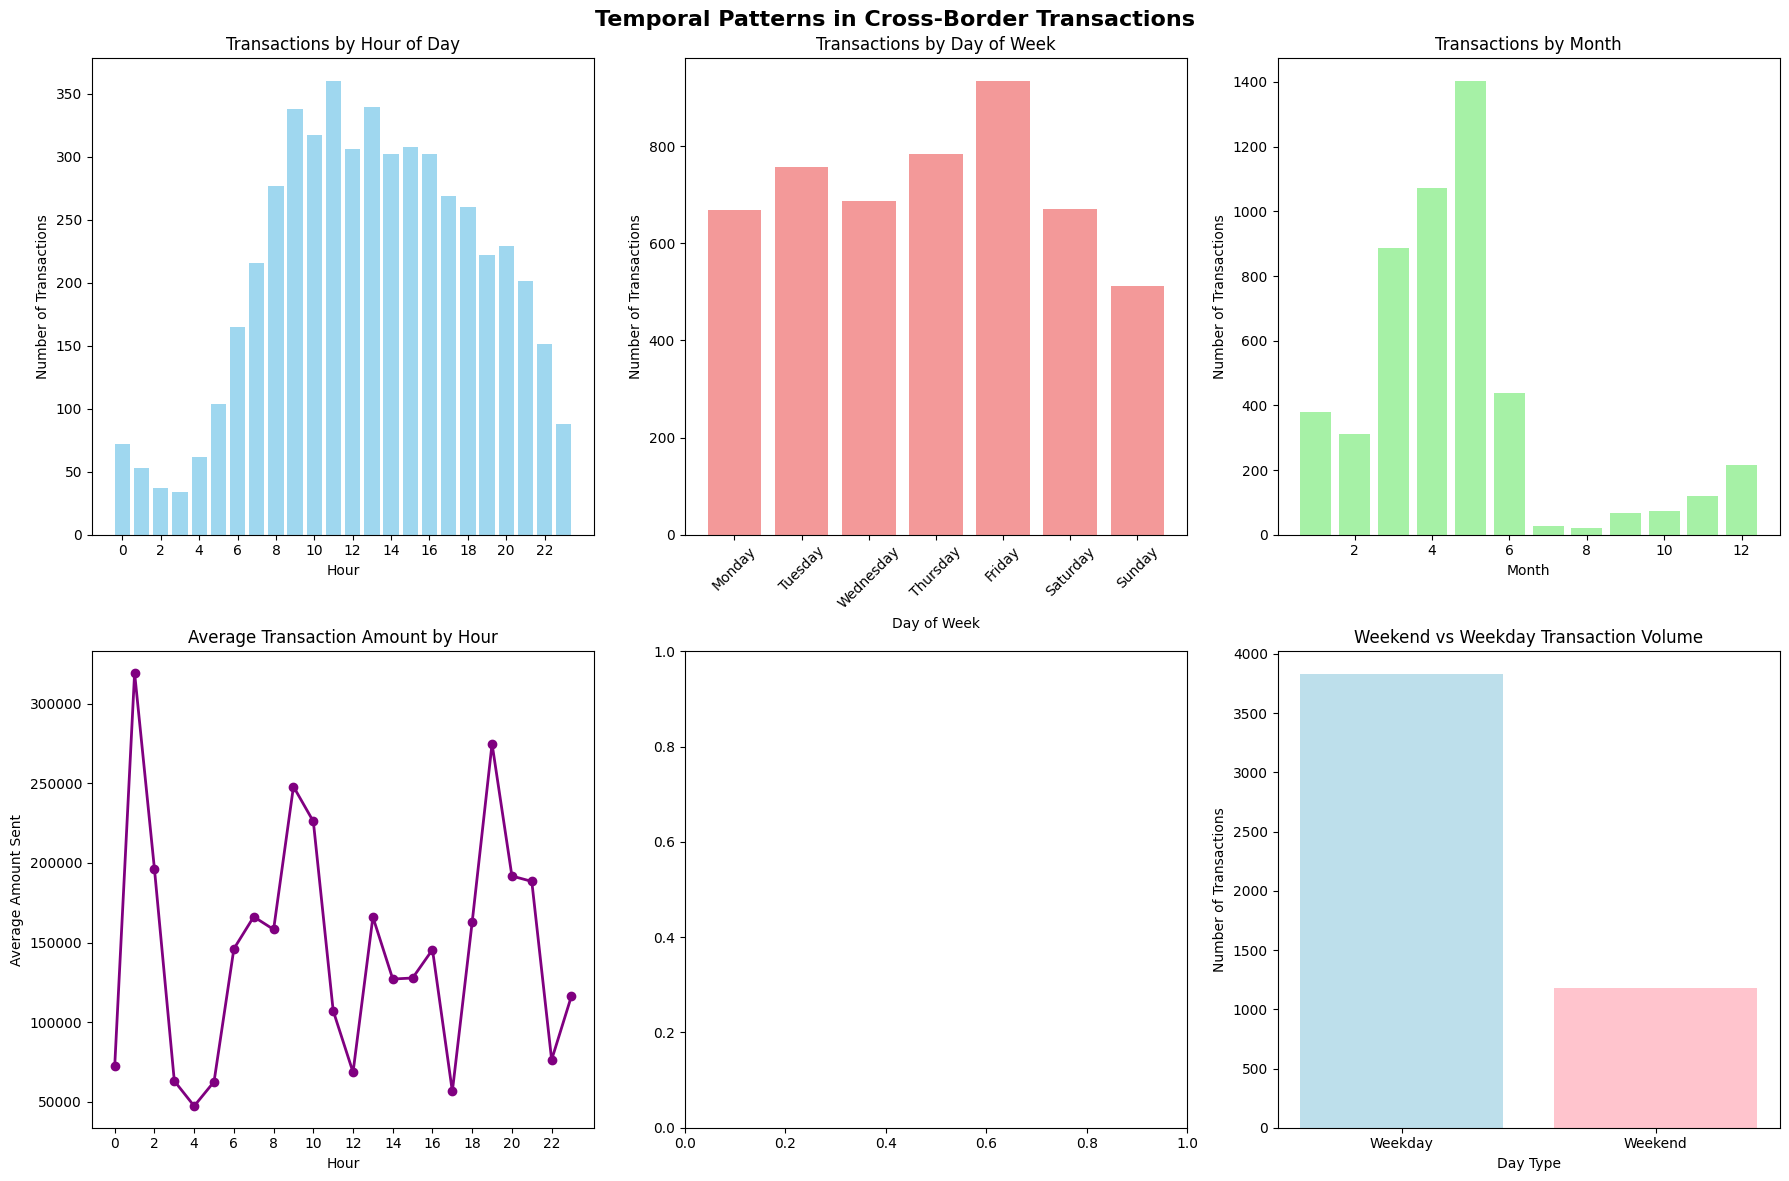


TEMPORAL INSIGHTS:
Peak Transaction Hour: 11:00 AM (360 transactions)
Lowest Transaction Hour: 3:00 AM (34 transactions)
Most Active Day: Friday (934 transactions)
Weekend Transaction Share: 23.6%


,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,transaction_id,conversion_ratio,date,day_of_week,day_name,month,is_weekend,Transaction_hour
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,NGN,EUR,23.50,Cancelled,18850,0.000588,2025-03-23,6,Sunday,3,True,15
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,NGN,GBP,5.00,Successful,18879,0.000496,2025-03-24,0,Monday,3,False,8
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,GBP,NGN,2000.00,Cancelled,659,1999.998000,2024-07-10,2,Wednesday,7,False,15
5,18883,2.45,2025-03-24 15:10:14,2025-03-24 15:10:14,6409,5864,GBP,NGN,5000.00,Successful,18902,2040.815494,2025-03-24,0,Monday,3,False,15
6,18902,403000.00,2025-03-25 07:41:12,2025-03-25 07:41:12,786,983,NGN,GBP,200.00,Successful,18921,0.000496,2025-03-25,1,Tuesday,3,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,22487,40793.00,2025-06-09 20:45:14,2025-06-09 20:45:14,10027,7521,NGN,GBP,19.00,Successful,22506,0.000466,2025-06-09,0,Monday,6,False,20
5753,22488,50003.63,2025-06-09 20:58:26,2025-06-09 20:58:26,6904,3225,NGN,GBP,23.29,Successful,22507,0.000466,2025-06-09,0,Monday,6,False,20
5754,22489,250018.15,2025-06-09 21:00:31,2025-06-09 21:00:31,9518,4017,NGN,GBP,116.45,Successful,22508,0.000466,2025-06-09,0,Monday,6,False,21
5755,22490,70013.67,2025-06-09 21:06:33,2025-06-09 21:06:33,3505,3225,NGN,GBP,32.61,Successful,22509,0.000466,2025-06-09,0,Monday,6,False,21


In [16]:
def analyze_temporal_patterns(df1):
    """
    Analyze time-based patterns in transactions
    """
    print("\n" + "=" * 60)
    print("TEMPORAL PATTERNS ANALYSIS")
    print("=" * 60)

    # Ensure datetime columns are properly formatted
    df1['Transaction_Created_At'] = pd.to_datetime(df1['Transaction_Created_At'])
    df1['updated_at'] = pd.to_datetime(df1['updated_at'])

    # Create time-based features
    df1['day_of_week'] = df1['Transaction_Created_At'].dt.dayofweek
    df1['day_name'] = df1['Transaction_Created_At'].dt.day_name()
    df1['month'] = df1['Transaction_Created_At'].dt.month
    df1['is_weekend'] = df1['day_of_week'].isin([5, 6])
    df1['Transaction_hour'] = df1['Transaction_Created_At'].dt.hour

    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Temporal Patterns in Cross-Border Transactions', fontsize=16, fontweight='bold')

    # 1. Hourly Transaction Pattern
    hourly_counts = df1.groupby('Transaction_hour').size()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values, color='skyblue', alpha=0.8)
    axes[0, 0].set_title('Transactions by Hour of Day')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Number of Transactions')
    axes[0, 0].set_xticks(range(0, 24, 2))

    # 2. Day of Week Pattern
    daily_counts = df1.groupby('day_name').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    axes[0, 1].bar(daily_counts.index, daily_counts.values, color='lightcoral', alpha=0.8)
    axes[0, 1].set_title('Transactions by Day of Week')
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].set_ylabel('Number of Transactions')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Monthly Pattern
    monthly_counts = df1.groupby('month').size()
    axes[0, 2].bar(monthly_counts.index, monthly_counts.values, color='lightgreen', alpha=0.8)
    axes[0, 2].set_title('Transactions by Month')
    axes[0, 2].set_xlabel('Month')
    axes[0, 2].set_ylabel('Number of Transactions')

    # 4. Hourly Amount Pattern
    hourly_amounts = df1.groupby('Transaction_hour')['amount_sent'].mean()
    axes[1, 0].plot(hourly_amounts.index, hourly_amounts.values, marker='o', linewidth=2, color='purple')
    axes[1, 0].set_title('Average Transaction Amount by Hour')
    axes[1, 0].set_xlabel('Hour')
    axes[1, 0].set_ylabel('Average Amount Sent')
    axes[1, 0].set_xticks(range(0, 24, 2))


    # 5. Weekend vs Weekday Comparison
    weekend_comparison = df1.groupby('is_weekend').agg({
        'amount_sent': ['count', 'mean', 'sum']
    }).round(2)

    weekend_labels = ['Weekday', 'Weekend']
    weekend_counts = [weekend_comparison.loc[False, ('amount_sent', 'count')],
                     weekend_comparison.loc[True, ('amount_sent', 'count')]]

    axes[1, 2].bar(weekend_labels, weekend_counts, color=['lightblue', 'lightpink'], alpha=0.8)
    axes[1, 2].set_title('Weekend vs Weekday Transaction Volume')
    axes[1, 2].set_xlabel('Day Type')
    axes[1, 2].set_ylabel('Number of Transactions')

    plt.tight_layout()
    plt.show()

    # Print temporal insights
    print("\nTEMPORAL INSIGHTS:")
    print(f"Peak Transaction Hour: {hourly_counts.idxmax()}:00 AM ({hourly_counts.max():,} transactions)")
    print(f"Lowest Transaction Hour: {hourly_counts.idxmin()}:00 AM ({hourly_counts.min():,} transactions)")
    print(f"Most Active Day: {daily_counts.idxmax()} ({daily_counts.max():,} transactions)")
    print(f"Weekend Transaction Share: {(df1['is_weekend'].sum() / len(df1) * 100):.1f}%")

    return df1

analyze_temporal_patterns(df1)


GEOGRAPHIC FLOW ANALYSIS


/tmp/ipython-input-710289504.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(conversion_data, labels=[pair.replace(' → ', '\n→\n') for pair in top_5_pairs])


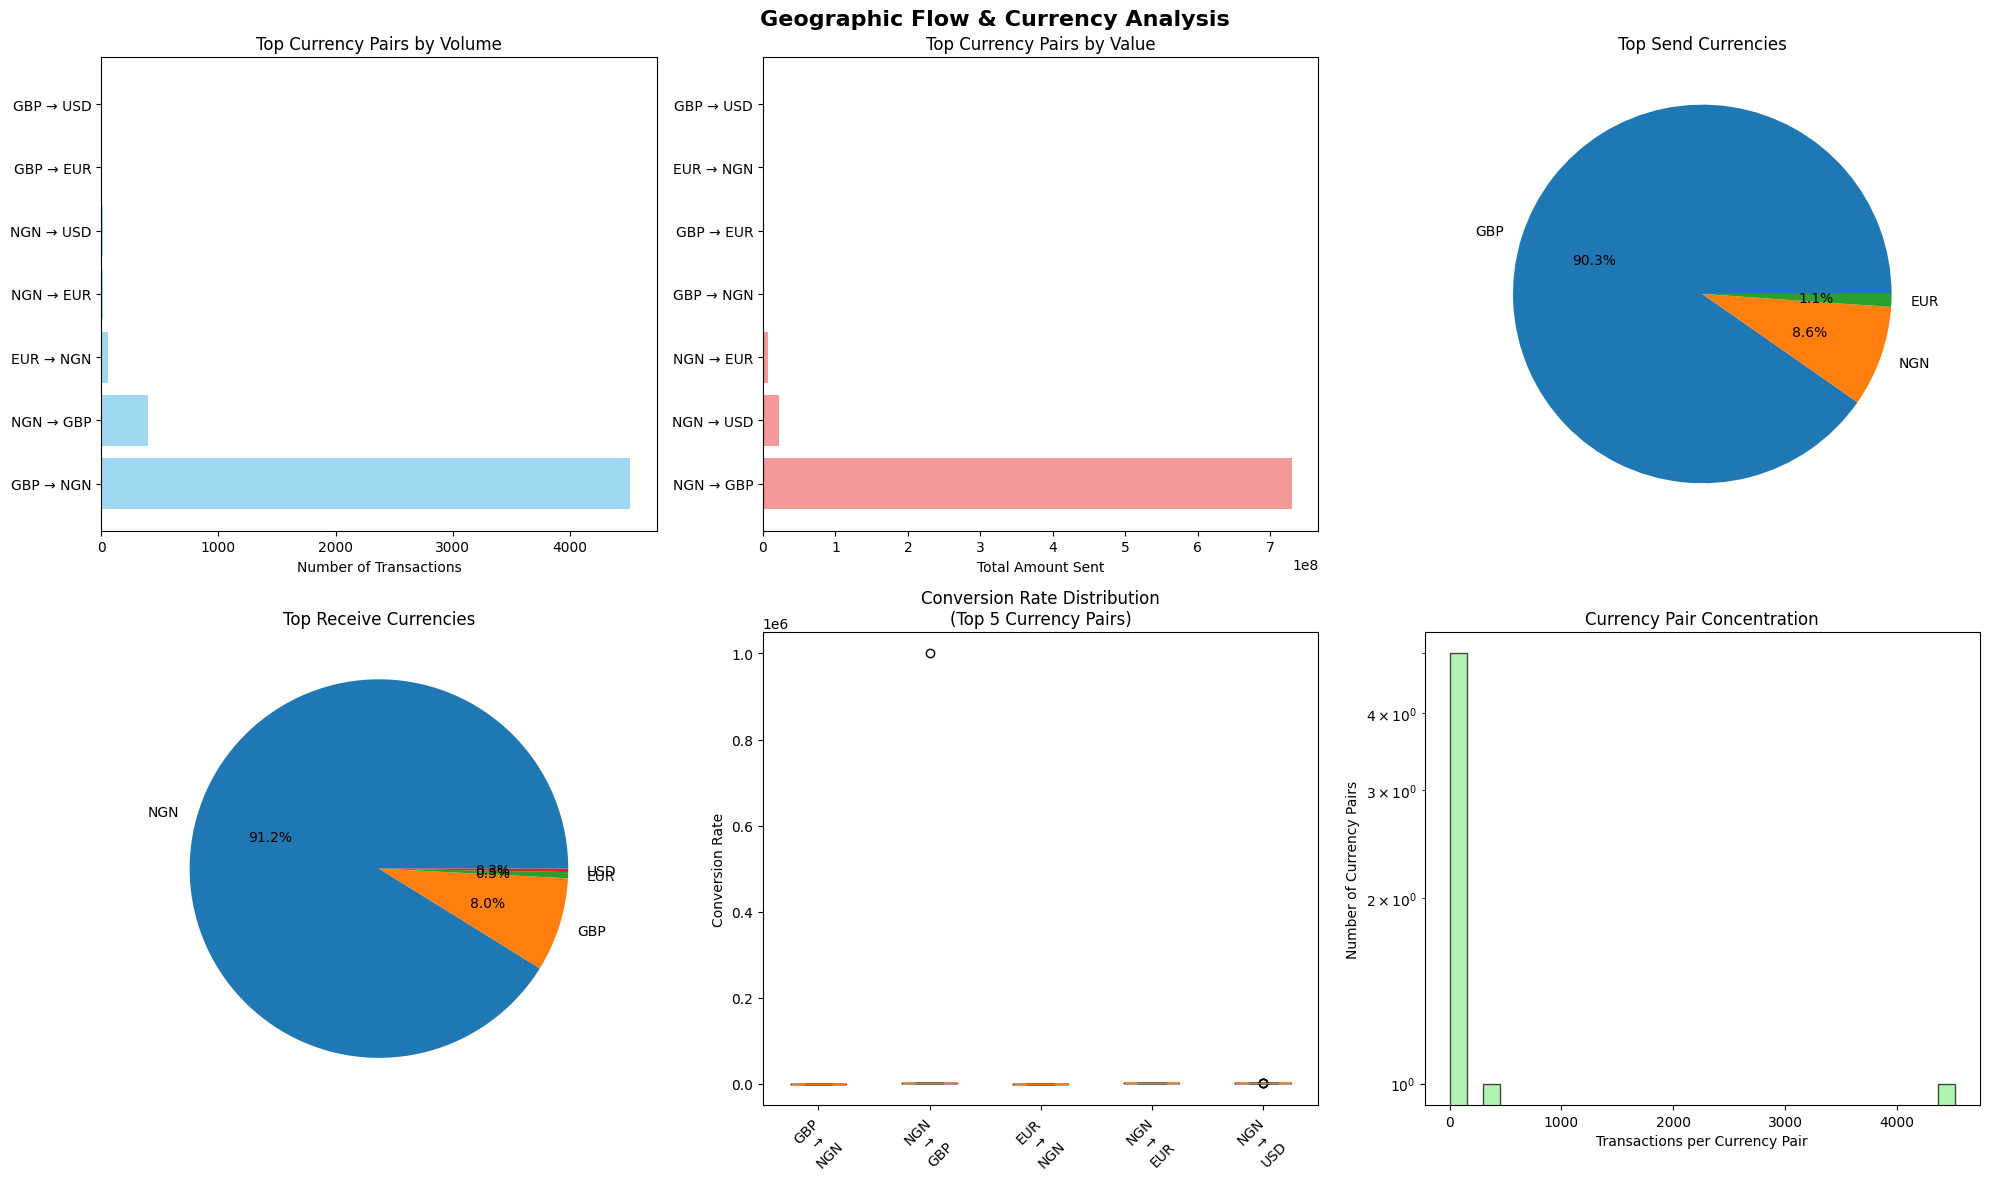


GEOGRAPHIC INSIGHTS:
Total Unique Currency Pairs: 7
Most Popular Currency Pair: GBP → NGN (4514.0 transactions)
Highest Value Currency Pair: NGN → GBP (729,715,412.12)

CURRENCY INSIGHTS:
Unique Send Currencies: 3
Unique Receive Currencies: 4
Most Common Send Currency: GBP (4526 transactions)
Most Common Receive Currency: NGN (4569 transactions)


(         id  amount_recieved Transaction_Created_At          updated_at  \
 0     18831         39950.00    2025-03-23 15:19:36 2025-03-23 15:19:36   
 1     18860         10075.00    2025-03-24 08:24:46 2025-03-24 08:24:46   
 2       696             1.00    2024-07-10 15:18:37 2024-07-10 15:18:37   
 5     18883             2.45    2025-03-24 15:10:14 2025-03-24 15:10:14   
 6     18902        403000.00    2025-03-25 07:41:12 2025-03-25 07:41:12   
 ...     ...              ...                    ...                 ...   
 5752  22487         40793.00    2025-06-09 20:45:14 2025-06-09 20:45:14   
 5753  22488         50003.63    2025-06-09 20:58:26 2025-06-09 20:58:26   
 5754  22489        250018.15    2025-06-09 21:00:31 2025-06-09 21:00:31   
 5755  22490         70013.67    2025-06-09 21:06:33 2025-06-09 21:06:33   
 5756  22491        300000.31    2025-06-09 21:09:33 2025-06-09 21:09:33   
 
       recipient_id  Sender_id receive_currency send_currency  amount_sent  \
 0      

In [17]:
def analyze_geographic_flows(df1):
    """
    Analyze currency flows and geographic patterns
    """
    print("\n" + "=" * 60)
    print("GEOGRAPHIC FLOW ANALYSIS")
    print("=" * 60)

    # Create currency pair analysis
    df1['currency_pair'] = df1['send_currency'].astype(str) + ' → ' + df1['receive_currency'].astype(str)

    # Currency flow statistics
    currency_stats = df1.groupby('currency_pair').agg({
        'amount_sent': ['count', 'sum', 'mean'],
        'amount_recieved': ['sum', 'mean'],
        'conversion_ratio': 'mean'
    }).round(2)

    currency_stats.columns = ['Transaction_Count', 'Total_Sent', 'Avg_Sent',
                             'Total_Received', 'Avg_Received', 'Avg_Conversion_Rate']
    currency_stats = currency_stats.sort_values('Transaction_Count', ascending=False)

    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Geographic Flow & Currency Analysis', fontsize=16, fontweight='bold')

    # 1. Top Currency Pairs by Volume
    top_pairs = currency_stats.head(10)
    axes[0, 0].barh(range(len(top_pairs)), top_pairs['Transaction_Count'], color='skyblue', alpha=0.8)
    axes[0, 0].set_yticks(range(len(top_pairs)))
    axes[0, 0].set_yticklabels(top_pairs.index, fontsize=10)
    axes[0, 0].set_title('Top Currency Pairs by Volume')
    axes[0, 0].set_xlabel('Number of Transactions')

    # 2. Top Currency Pairs by Value
    top_value_pairs = currency_stats.sort_values('Total_Sent', ascending=False).head(10)
    axes[0, 1].barh(range(len(top_value_pairs)), top_value_pairs['Total_Sent'], color='lightcoral', alpha=0.8)
    axes[0, 1].set_yticks(range(len(top_value_pairs)))
    axes[0, 1].set_yticklabels(top_value_pairs.index, fontsize=10)
    axes[0, 1].set_title('Top Currency Pairs by Value')
    axes[0, 1].set_xlabel('Total Amount Sent')

    # 3. Send Currency Distribution
    send_currency_counts = df1['send_currency'].value_counts().head(10)
    axes[0, 2].pie(send_currency_counts.values, labels=send_currency_counts.index, autopct='%1.1f%%')
    axes[0, 2].set_title('Top Send Currencies')

    # 4. Receive Currency Distribution
    receive_currency_counts = df1['receive_currency'].value_counts().head(10)
    axes[1, 0].pie(receive_currency_counts.values, labels=receive_currency_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Top Receive Currencies')

    # 5. Conversion Rate Distribution by Currency Pair
    top_5_pairs = currency_stats.head(5).index
    conversion_data = [df1[df1['currency_pair'] == pair]['conversion_ratio'].dropna() for pair in top_5_pairs]
    axes[1, 1].boxplot(conversion_data, labels=[pair.replace(' → ', '\n→\n') for pair in top_5_pairs])
    axes[1, 1].set_title('Conversion Rate Distribution\n(Top 5 Currency Pairs)')
    axes[1, 1].set_ylabel('Conversion Rate')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # 6. Currency Pair Concentration
    pair_concentration = df1['currency_pair'].value_counts()
    axes[1, 2].hist(pair_concentration.values, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 2].set_title('Currency Pair Concentration')
    axes[1, 2].set_xlabel('Transactions per Currency Pair')
    axes[1, 2].set_ylabel('Number of Currency Pairs')
    axes[1, 2].set_yscale('log')

    plt.tight_layout()
    plt.show()

    # Print geographic insights
    print("\nGEOGRAPHIC INSIGHTS:")
    print(f"Total Unique Currency Pairs: {df1['currency_pair'].nunique()}")
    print(f"Most Popular Currency Pair: {currency_stats.index[0]} ({currency_stats.iloc[0]['Transaction_Count']} transactions)")
    print(f"Highest Value Currency Pair: {top_value_pairs.index[0]} ({top_value_pairs.iloc[0]['Total_Sent']:,.2f})")

    print(f"\nCURRENCY INSIGHTS:")
    print(f"Unique Send Currencies: {df1['send_currency'].nunique()}")
    print(f"Unique Receive Currencies: {df1['receive_currency'].nunique()}")
    print(f"Most Common Send Currency: {send_currency_counts.index[0]} ({send_currency_counts.iloc[0]} transactions)")
    print(f"Most Common Receive Currency: {receive_currency_counts.index[0]} ({receive_currency_counts.iloc[0]} transactions)")

    return df1, currency_stats

analyze_geographic_flows(df1)


CUSTOMER BEHAVIOR ANALYSIS


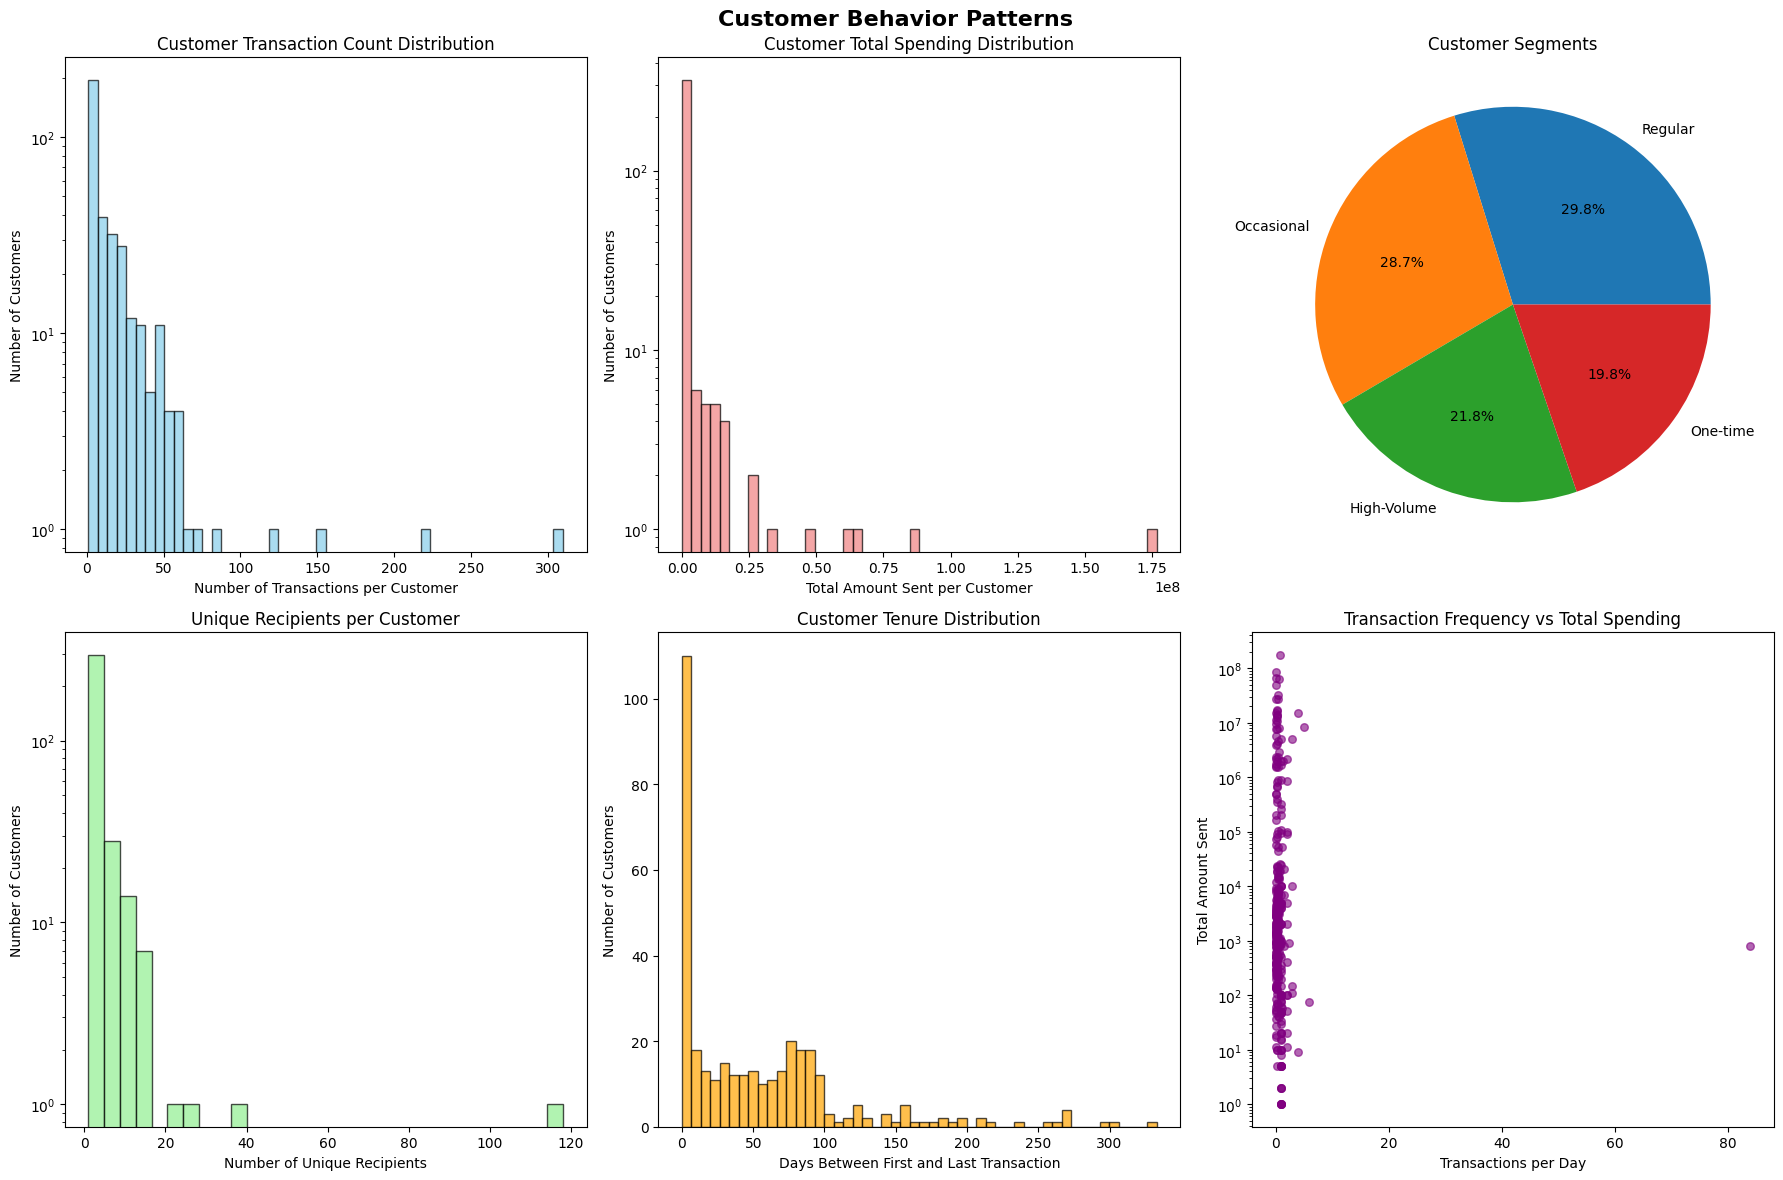


CUSTOMER INSIGHTS:
Total Unique Customers: 349
Average Transactions per Customer: 14.36
Median Transactions per Customer: 6
Top 1% Customers Account for: 43.3% of total value

CUSTOMER SEGMENTS:
Regular: 104 customers (29.8%)
Occasional: 100 customers (28.7%)
High-Volume: 76 customers (21.8%)
One-time: 69 customers (19.8%)


(         id  amount_recieved Transaction_Created_At          updated_at  \
 0     18831         39950.00    2025-03-23 15:19:36 2025-03-23 15:19:36   
 1     18860         10075.00    2025-03-24 08:24:46 2025-03-24 08:24:46   
 2       696             1.00    2024-07-10 15:18:37 2024-07-10 15:18:37   
 5     18883             2.45    2025-03-24 15:10:14 2025-03-24 15:10:14   
 6     18902        403000.00    2025-03-25 07:41:12 2025-03-25 07:41:12   
 ...     ...              ...                    ...                 ...   
 5752  22487         40793.00    2025-06-09 20:45:14 2025-06-09 20:45:14   
 5753  22488         50003.63    2025-06-09 20:58:26 2025-06-09 20:58:26   
 5754  22489        250018.15    2025-06-09 21:00:31 2025-06-09 21:00:31   
 5755  22490         70013.67    2025-06-09 21:06:33 2025-06-09 21:06:33   
 5756  22491        300000.31    2025-06-09 21:09:33 2025-06-09 21:09:33   
 
       recipient_id  Sender_id receive_currency send_currency  amount_sent  \
 0      

In [18]:
def analyze_customer_behavior(df1):
    """
    Analyze customer behavior patterns and profiles
    """
    print("\n" + "=" * 60)
    print("CUSTOMER BEHAVIOR ANALYSIS")
    print("=" * 60)

    # Customer-level aggregations
    customer_stats = df1.groupby('Sender_id').agg({
        'amount_sent': ['count', 'sum', 'mean', 'std'],
        'amount_recieved': ['sum', 'mean'],
        'recipient_id': 'nunique',
        'send_currency': 'nunique',
        'receive_currency': 'nunique',
        'Transaction_Created_At': ['min', 'max']
    }).round(2)

    # Flatten column names
    customer_stats.columns = ['tx_count', 'total_sent', 'avg_sent', 'std_sent',
                             'total_received', 'avg_received', 'unique_recipients',
                             'unique_send_currencies', 'unique_receive_currencies',
                             'first_transaction', 'last_transaction']

    # Calculate customer tenure and frequency
    customer_stats['tenure_days'] = (customer_stats['last_transaction'] - customer_stats['first_transaction']).dt.days
    customer_stats['tx_frequency'] = customer_stats['tx_count'] / (customer_stats['tenure_days'] + 1)

    # Customer segments
    customer_stats['customer_segment'] = pd.cut(customer_stats['tx_count'],
                                               bins=[0, 1, 5, 20, float('inf')],
                                               labels=['One-time', 'Occasional', 'Regular', 'High-Volume'])

    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Customer Behavior Patterns', fontsize=16, fontweight='bold')

    # 1. Customer Transaction Count Distribution
    axes[0, 0].hist(customer_stats['tx_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Customer Transaction Count Distribution')
    axes[0, 0].set_xlabel('Number of Transactions per Customer')
    axes[0, 0].set_ylabel('Number of Customers')
    axes[0, 0].set_yscale('log')

    # 2. Customer Spending Distribution
    axes[0, 1].hist(customer_stats['total_sent'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Customer Total Spending Distribution')
    axes[0, 1].set_xlabel('Total Amount Sent per Customer')
    axes[0, 1].set_ylabel('Number of Customers')
    axes[0, 1].set_yscale('log')

    # 3. Customer Segments
    segment_counts = customer_stats['customer_segment'].value_counts()
    axes[0, 2].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
    axes[0, 2].set_title('Customer Segments')

    # 4. Recipients per Customer
    axes[1, 0].hist(customer_stats['unique_recipients'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Unique Recipients per Customer')
    axes[1, 0].set_xlabel('Number of Unique Recipients')
    axes[1, 0].set_ylabel('Number of Customers')
    axes[1, 0].set_yscale('log')

    # 5. Customer Tenure Distribution
    axes[1, 1].hist(customer_stats['tenure_days'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 1].set_title('Customer Tenure Distribution')
    axes[1, 1].set_xlabel('Days Between First and Last Transaction')
    axes[1, 1].set_ylabel('Number of Customers')

    # 6. Transaction Frequency vs Total Spending
    axes[1, 2].scatter(customer_stats['tx_frequency'], customer_stats['total_sent'],
                      alpha=0.6, s=30, color='purple')
    axes[1, 2].set_title('Transaction Frequency vs Total Spending')
    axes[1, 2].set_xlabel('Transactions per Day')
    axes[1, 2].set_ylabel('Total Amount Sent')
    axes[1, 2].set_yscale('log')

    plt.tight_layout()
    plt.show()

    # Print customer insights
    print("\nCUSTOMER INSIGHTS:")
    print(f"Total Unique Customers: {len(customer_stats):,}")
    print(f"Average Transactions per Customer: {customer_stats['tx_count'].mean():.2f}")
    print(f"Median Transactions per Customer: {customer_stats['tx_count'].median():.0f}")
    print(f"Top 1% Customers Account for: {(customer_stats.nlargest(int(len(customer_stats)*0.01), 'total_sent')['total_sent'].sum() / customer_stats['total_sent'].sum() * 100):.1f}% of total value")

    print(f"\nCUSTOMER SEGMENTS:")
    for segment in segment_counts.index:
        count = segment_counts[segment]
        pct = count / len(customer_stats) * 100
        print(f"{segment}: {count:,} customers ({pct:.1f}%)")

    return df1, customer_stats

analyze_customer_behavior(df1)


RELATIONSHIP NETWORK ANALYSIS


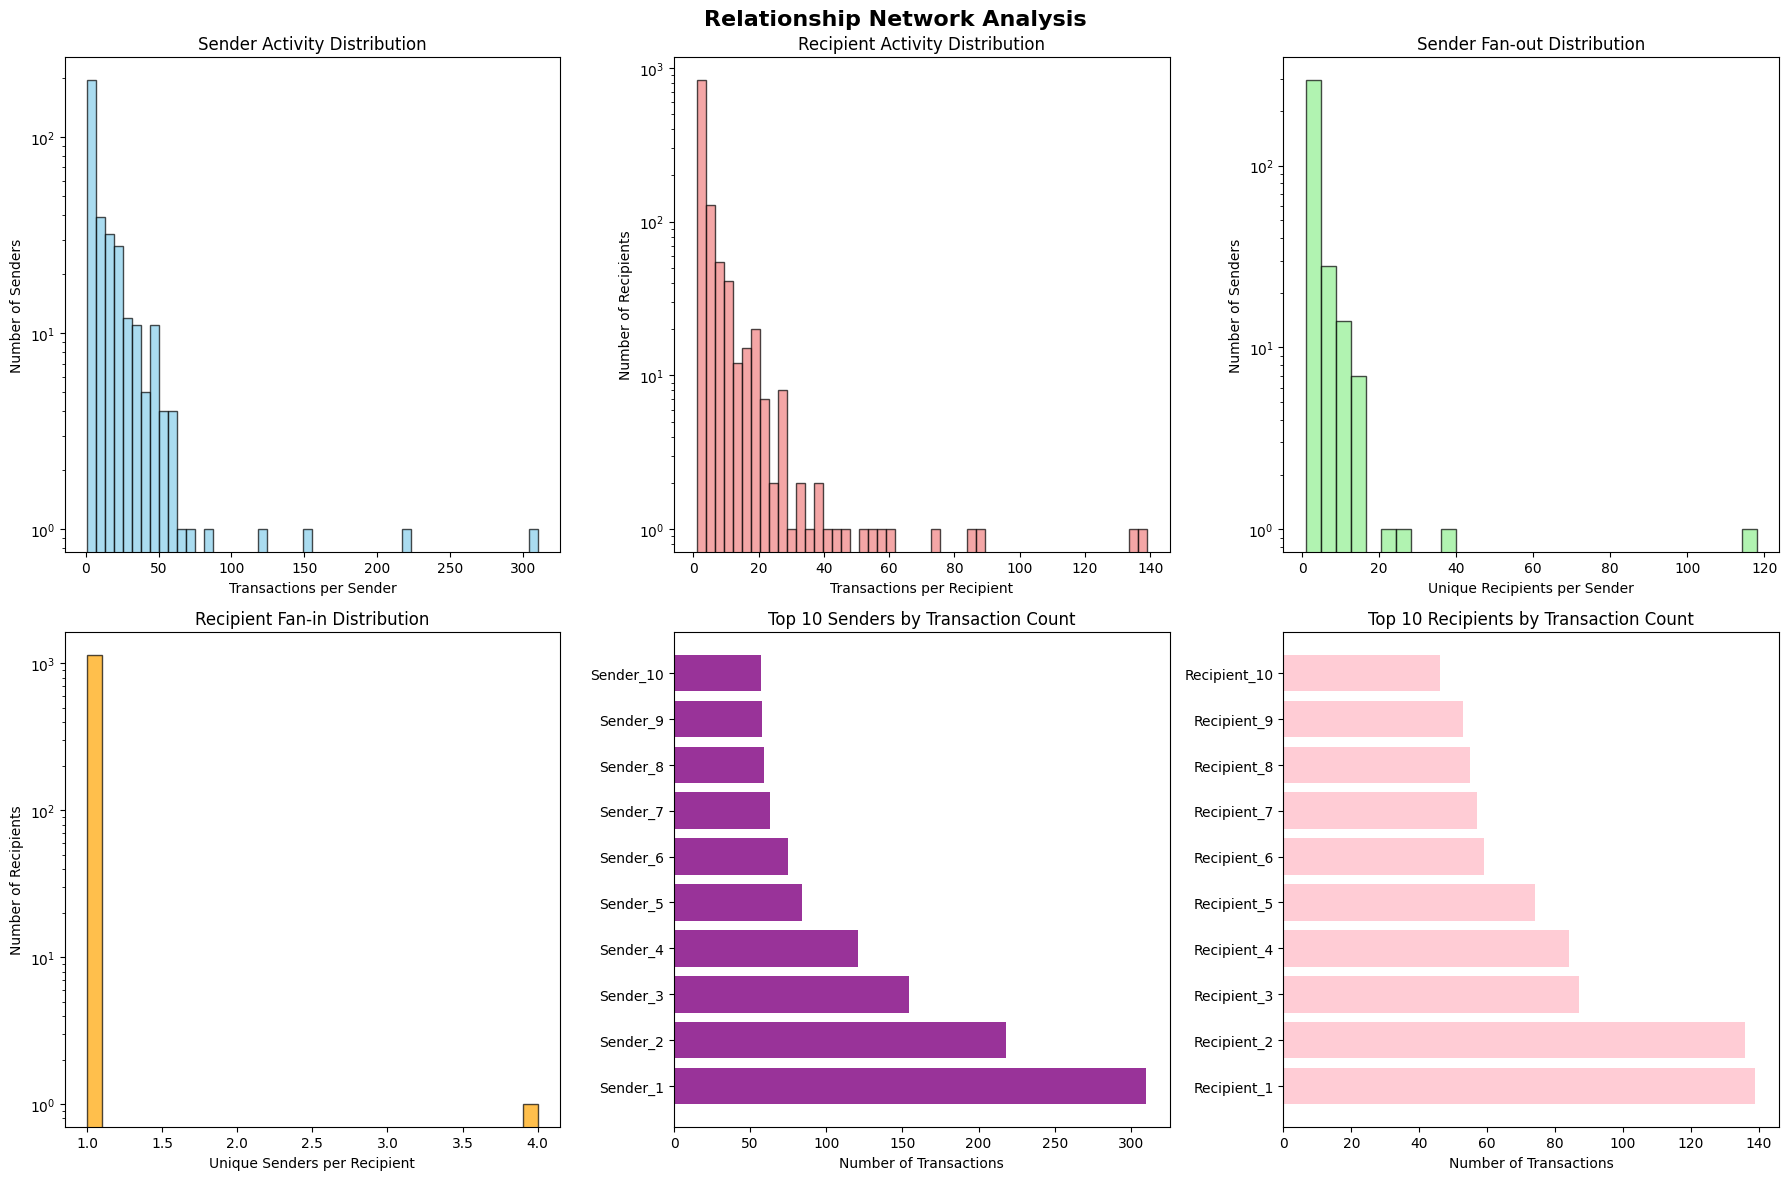


NETWORK INSIGHTS:
Total Unique Senders: 349
Total Unique Recipients: 1,143
Average Recipients per Sender: 3.28
Average Senders per Recipient: 1.00

POTENTIAL RISK INDICATORS:
High Fan-out Senders (>95th percentile): 16 senders
High Fan-in Recipients (>95th percentile): 1 recipients
Top Fan-out Sender has 118 unique recipients
Top Fan-in Recipient has 4 unique senders


(         id  amount_recieved Transaction_Created_At          updated_at  \
 0     18831         39950.00    2025-03-23 15:19:36 2025-03-23 15:19:36   
 1     18860         10075.00    2025-03-24 08:24:46 2025-03-24 08:24:46   
 2       696             1.00    2024-07-10 15:18:37 2024-07-10 15:18:37   
 5     18883             2.45    2025-03-24 15:10:14 2025-03-24 15:10:14   
 6     18902        403000.00    2025-03-25 07:41:12 2025-03-25 07:41:12   
 ...     ...              ...                    ...                 ...   
 5752  22487         40793.00    2025-06-09 20:45:14 2025-06-09 20:45:14   
 5753  22488         50003.63    2025-06-09 20:58:26 2025-06-09 20:58:26   
 5754  22489        250018.15    2025-06-09 21:00:31 2025-06-09 21:00:31   
 5755  22490         70013.67    2025-06-09 21:06:33 2025-06-09 21:06:33   
 5756  22491        300000.31    2025-06-09 21:09:33 2025-06-09 21:09:33   
 
       recipient_id  Sender_id receive_currency send_currency  amount_sent  \
 0      

In [19]:
def analyze_relationship_networks(df1):
    """
    Analyze sender-recipient relationships and network patterns
    """
    print("\n" + "=" * 60)
    print("RELATIONSHIP NETWORK ANALYSIS")
    print("=" * 60)

    # Sender analysis
    sender_stats = df1.groupby('Sender_id').agg({
        'amount_sent': ['count', 'sum', 'mean'],
        'recipient_id': 'nunique',
        'id': 'nunique'
    }).round(2)
    sender_stats.columns = ['tx_count', 'total_sent', 'avg_sent', 'unique_recipients', 'unique_customers']

    # Recipient analysis
    recipient_stats = df1.groupby('recipient_id').agg({
        'amount_recieved': ['count', 'sum', 'mean'],
        'Sender_id': 'nunique',
        'id': 'nunique'
    }).round(2)
    recipient_stats.columns = ['tx_count', 'total_received', 'avg_received', 'unique_senders', 'unique_customers']

    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Relationship Network Analysis', fontsize=16, fontweight='bold')

    # 1. Sender Activity Distribution
    axes[0, 0].hist(sender_stats['tx_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Sender Activity Distribution')
    axes[0, 0].set_xlabel('Transactions per Sender')
    axes[0, 0].set_ylabel('Number of Senders')
    axes[0, 0].set_yscale('log')

    # 2. Recipient Activity Distribution
    axes[0, 1].hist(recipient_stats['tx_count'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Recipient Activity Distribution')
    axes[0, 1].set_xlabel('Transactions per Recipient')
    axes[0, 1].set_ylabel('Number of Recipients')
    axes[0, 1].set_yscale('log')

    # 3. Sender Fan-out (recipients per sender)
    axes[0, 2].hist(sender_stats['unique_recipients'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Sender Fan-out Distribution')
    axes[0, 2].set_xlabel('Unique Recipients per Sender')
    axes[0, 2].set_ylabel('Number of Senders')
    axes[0, 2].set_yscale('log')

    # 4. Recipient Fan-in (senders per recipient)
    axes[1, 0].hist(recipient_stats['unique_senders'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].set_title('Recipient Fan-in Distribution')
    axes[1, 0].set_xlabel('Unique Senders per Recipient')
    axes[1, 0].set_ylabel('Number of Recipients')
    axes[1, 0].set_yscale('log')

    # 5. Top Senders by Volume
    top_senders = sender_stats.nlargest(10, 'tx_count')
    axes[1, 1].barh(range(len(top_senders)), top_senders['tx_count'], color='purple', alpha=0.8)
    axes[1, 1].set_yticks(range(len(top_senders)))
    axes[1, 1].set_yticklabels([f'Sender_{i+1}' for i in range(len(top_senders))])
    axes[1, 1].set_title('Top 10 Senders by Transaction Count')
    axes[1, 1].set_xlabel('Number of Transactions')

    # 6. Top Recipients by Volume
    top_recipients = recipient_stats.nlargest(10, 'tx_count')
    axes[1, 2].barh(range(len(top_recipients)), top_recipients['tx_count'], color='pink', alpha=0.8)
    axes[1, 2].set_yticks(range(len(top_recipients)))
    axes[1, 2].set_yticklabels([f'Recipient_{i+1}' for i in range(len(top_recipients))])
    axes[1, 2].set_title('Top 10 Recipients by Transaction Count')
    axes[1, 2].set_xlabel('Number of Transactions')

    plt.tight_layout()
    plt.show()

    # Identify potential suspicious patterns
    # High fan-out senders (potential money distributors)
    high_fanout_senders = sender_stats[sender_stats['unique_recipients'] > sender_stats['unique_recipients'].quantile(0.95)]

    # High fan-in recipients (potential money collectors)
    high_fanin_recipients = recipient_stats[recipient_stats['unique_senders'] > recipient_stats['unique_senders'].quantile(0.95)]

    # Print network insights
    print("\nNETWORK INSIGHTS:")
    print(f"Total Unique Senders: {len(sender_stats):,}")
    print(f"Total Unique Recipients: {len(recipient_stats):,}")
    print(f"Average Recipients per Sender: {sender_stats['unique_recipients'].mean():.2f}")
    print(f"Average Senders per Recipient: {recipient_stats['unique_senders'].mean():.2f}")

    print(f"\nPOTENTIAL RISK INDICATORS:")
    print(f"High Fan-out Senders (>95th percentile): {len(high_fanout_senders)} senders")
    print(f"High Fan-in Recipients (>95th percentile): {len(high_fanin_recipients)} recipients")

    if len(high_fanout_senders) > 0:
        print(f"Top Fan-out Sender has {high_fanout_senders['unique_recipients'].max()} unique recipients")
    if len(high_fanin_recipients) > 0:
        print(f"Top Fan-in Recipient has {high_fanin_recipients['unique_senders'].max()} unique senders")

    return df1, sender_stats, recipient_stats

analyze_relationship_networks(df1)


ANOMALY DETECTION FEATURE PREPARATION


/tmp/ipython-input-2370699781.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.set_index('Transaction_Created_At')
/tmp/ipython-input-2370699781.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.set_index('Transaction_Created_At')


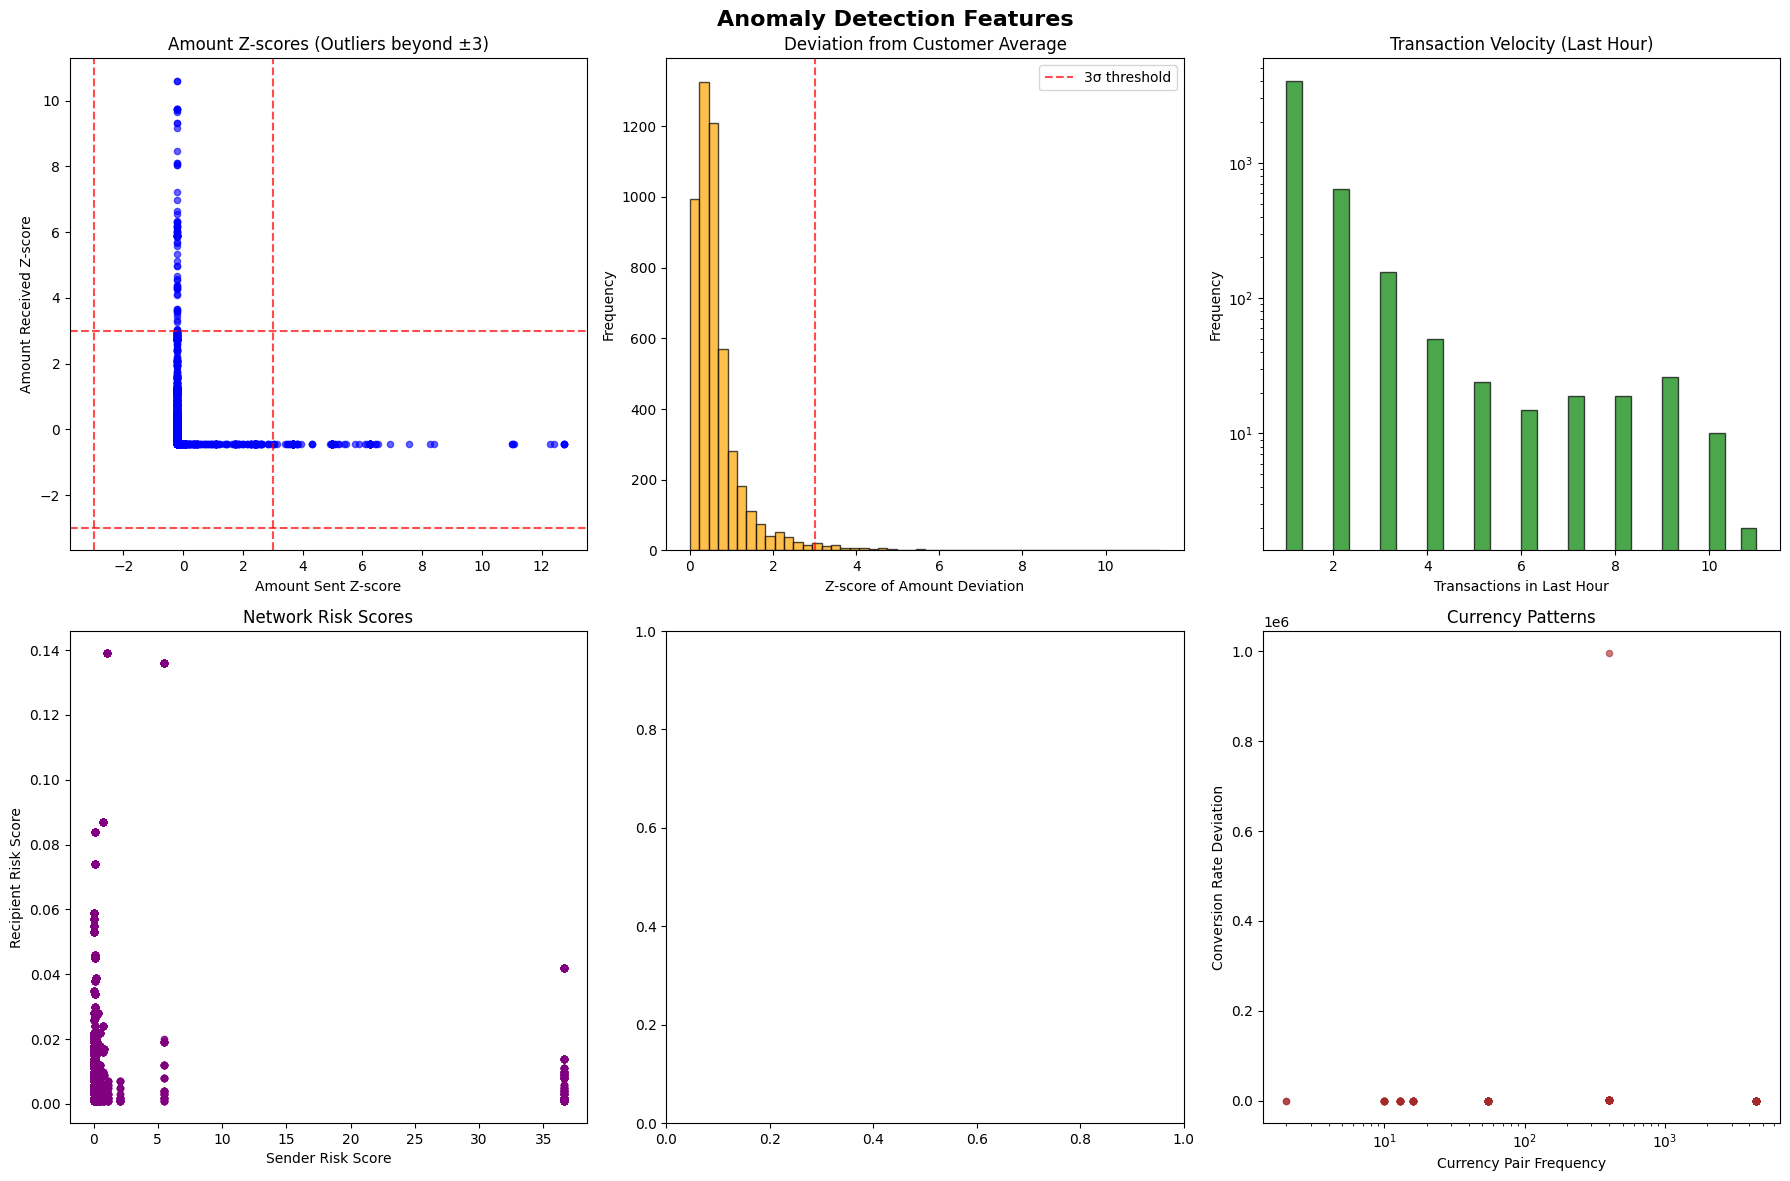


ANOMALY INDICATORS SUMMARY:
High Amount Z-score (>3σ): 124 transactions (2.47%)
High Customer Deviation (>3σ): 93 transactions (1.86%)
Rapid Transactions (<5 min): 406 transactions (8.10%)
Night Transactions (22:00-06:00): 766 transactions (15.28%)
Rare Currency Pairs (<5th percentile): 96 transactions (1.92%)

FEATURES READY FOR ANOMALY DETECTION: 14 features
Features: ['amount_sent_zscore', 'amount_received_zscore', 'amount_deviation_zscore', 'is_round_amount', 'is_night_transaction', 'is_weekend_transaction', 'rapid_transaction', 'tx_count_last_hour', 'tx_count_last_day', 'sender_risk_score', 'recipient_risk_score', 'currency_pair_rarity', 'conversion_rate_deviation', 'is_rare_currency_pair']


In [20]:
def prepare_anomaly_features(df1):
    """
    Create features specifically for anomaly detection
    """
    print("\n" + "=" * 60)
    print("ANOMALY DETECTION FEATURE PREPARATION")
    print("=" * 60)

    # Create a copy for feature engineering
    df_features = df1.copy()

    # 1. AMOUNT-BASED FEATURES
    # Z-score for amounts
    df_features['amount_sent_zscore'] = (df_features['amount_sent'] - df_features['amount_sent'].mean()) / df_features['amount_sent'].std()
    df_features['amount_received_zscore'] = (df_features['amount_recieved'] - df_features['amount_recieved'].mean()) / df_features['amount_recieved'].std()

    # Round number indicator
    df_features['is_round_amount'] = ((df_features['amount_sent'] % 100 == 0) |
                                       (df_features['amount_sent'] % 1000 == 0)).astype(int)

    # 2. CUSTOMER BEHAVIORAL FEATURES
    # Customer statistics
    customer_agg = df_features.groupby('Sender_id')['amount_sent'].agg(['mean', 'std', 'count']).reset_index()
    customer_agg.columns = ['Sender_id', 'customer_avg_amount', 'customer_std_amount', 'customer_tx_count']
    df_features = df_features.merge(customer_agg, on='Sender_id', how='left')
    df_features['customer_std_amount'] = df_features['customer_std_amount'].fillna(0)


    # Deviation from customer's normal behavior
    df_features['amount_deviation_from_avg'] = abs(df_features['amount_sent'] - df_features['customer_avg_amount'])
    df_features['amount_deviation_zscore'] = (df_features['amount_deviation_from_avg'] / (df_features['customer_std_amount'] + 1e-6)).fillna(0)

    # 3. TEMPORAL FEATURES
    # Time-based flags
    df_features['is_night_transaction'] = ((df_features['Transaction_hour'] >= 22) |
                                           (df_features['Transaction_hour'] <= 6)).astype(int)
    df_features['is_weekend_transaction'] = df_features['Transaction_Created_At'].dt.dayofweek.isin([5, 6]).astype(int)

    # 4. VELOCITY FEATURES
    # Sort by customer and time for velocity calculations
    df_features = df_features.sort_values(['Sender_id', 'Transaction_Created_At'])


    # Time between transactions
    df_features['time_since_last_tx'] = df_features.groupby('Sender_id')['Transaction_Created_At'].diff().dt.total_seconds()
    df_features['rapid_transaction'] = (df_features['time_since_last_tx'] < 300).astype(int)  # Less than 5 minutes

    # Compute rolling transaction counts per Customer (1 hour and 1 day)
    df_features['tx_count_last_hour'] = (df_features.groupby('Sender_id', group_keys=False)
        .apply(lambda group: group.set_index('Transaction_Created_At')
        .rolling('1h', closed='both')['Sender_id'].count()).reset_index(drop=True))

    df_features['tx_count_last_day'] = (df_features.groupby('Sender_id', group_keys=False)
        .apply(lambda group: group.set_index('Transaction_Created_At')
        .rolling('1d', closed='both')['Sender_id'].count()).reset_index(drop=True))

    # 5. NETWORK FEATURES
    # Sender/Recipient risk scores
    sender_risk = df_features.groupby('Sender_id').agg({
        'recipient_id': 'nunique',
        'amount_sent': ['count', 'sum']
    })
    sender_risk.columns = ['sender_unique_recipients', 'sender_tx_count', 'sender_total_amount']
    sender_risk['sender_risk_score'] = (sender_risk['sender_unique_recipients'] * sender_risk['sender_tx_count']) / 1000
    sender_risk = sender_risk.reset_index()

    recipient_risk = df_features.groupby('recipient_id').agg({
        'Sender_id': 'nunique',
        'amount_recieved': ['count', 'sum']
    })
    recipient_risk.columns = ['recipient_unique_senders', 'recipient_tx_count', 'recipient_total_amount']
    recipient_risk['recipient_risk_score'] = (recipient_risk['recipient_unique_senders'] * recipient_risk['recipient_tx_count']) / 1000
    recipient_risk = recipient_risk.reset_index()

    # Merge risk scores
    df_features = df_features.merge(sender_risk[['Sender_id', 'sender_risk_score']], on='Sender_id', how='left')
    df_features = df_features.merge(recipient_risk[['recipient_id', 'recipient_risk_score']], on='recipient_id', how='left')

    # 6. CURRENCY FEATURES
    # Currency pair rarity
    currency_pair_counts = df_features['currency_pair'].value_counts()
    df_features['currency_pair_rarity'] = df_features['currency_pair'].map(currency_pair_counts)
    df_features['is_rare_currency_pair'] = (df_features['currency_pair_rarity'] < df_features['currency_pair_rarity'].quantile(0.05)).astype(int)

    # Conversion rate deviation
    currency_avg_rates = df_features.groupby('currency_pair')['conversion_ratio'].mean()
    df_features['currency_avg_rate'] = df_features['currency_pair'].map(currency_avg_rates)
    df_features['conversion_rate_deviation'] = abs(df_features['conversion_ratio'] - df_features['currency_avg_rate'])

    # Create visualization of key anomaly features
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Anomaly Detection Features', fontsize=16, fontweight='bold')

    # 1. Amount Z-scores
    axes[0, 0].scatter(df_features['amount_sent_zscore'], df_features['amount_received_zscore'], alpha=0.6, s=20, color='blue')
    axes[0, 0].axhline(y=3, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].axhline(y=-3, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].axvline(x=3, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].axvline(x=-3, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].set_title('Amount Z-scores (Outliers beyond ±3)')
    axes[0, 0].set_xlabel('Amount Sent Z-score')
    axes[0, 0].set_ylabel('Amount Received Z-score')

    # 2. Customer Behavior Deviation
    axes[0, 1].hist(df_features['amount_deviation_zscore'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='3σ threshold')
    axes[0, 1].set_title('Deviation from Customer Average')
    axes[0, 1].set_xlabel('Z-score of Amount Deviation')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()

    # 3. Transaction Velocity
    axes[0, 2].hist(df_features['tx_count_last_hour'], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0, 2].set_title('Transaction Velocity (Last Hour)')
    axes[0, 2].set_xlabel('Transactions in Last Hour')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_yscale('log')

    # 4. Risk Scores
    axes[1, 0].scatter(df_features['sender_risk_score'], df_features['recipient_risk_score'],
                     alpha=0.6, s=20, color='purple')
    axes[1, 0].set_title('Network Risk Scores')
    axes[1, 0].set_xlabel('Sender Risk Score')
    axes[1, 0].set_ylabel('Recipient Risk Score')

    # 5. Currency Pair Rarity vs Conversion Deviation
    axes[1, 2].scatter(df_features['currency_pair_rarity'], df_features['conversion_rate_deviation'],
                     alpha=0.6, s=20, color='brown')
    axes[1, 2].set_title('Currency Patterns')
    axes[1, 2].set_xlabel('Currency Pair Frequency')
    axes[1, 2].set_ylabel('Conversion Rate Deviation')
    axes[1, 2].set_xscale('log')

    plt.tight_layout()
    plt.show()

    # Summary of potential anomalies
    high_amount_zscore = (abs(df_features['amount_sent_zscore']) > 3).sum()
    high_deviation_customers = (df_features['amount_deviation_zscore'] > 3).sum()
    rapid_transactions = df_features['rapid_transaction'].sum()
    night_transactions = df_features['is_night_transaction'].sum()
    rare_currency_pairs = (df_features['currency_pair_rarity'] < df_features['currency_pair_rarity'].quantile(0.05)).sum()

    print("\nANOMALY INDICATORS SUMMARY:")
    print(f"High Amount Z-score (>3σ): {high_amount_zscore:,} transactions ({high_amount_zscore/len(df_features)*100:.2f}%)")
    print(f"High Customer Deviation (>3σ): {high_deviation_customers:,} transactions ({high_deviation_customers/len(df_features)*100:.2f}%)")
    print(f"Rapid Transactions (<5 min): {rapid_transactions:,} transactions ({rapid_transactions/len(df_features)*100:.2f}%)")
    print(f"Night Transactions (22:00-06:00): {night_transactions:,} transactions ({night_transactions/len(df_features)*100:.2f}%)")
    print(f"Rare Currency Pairs (<5th percentile): {rare_currency_pairs:,} transactions ({rare_currency_pairs/len(df_features)*100:.2f}%)")

    # List of features ready for ML models
    anomaly_features = [
        'amount_sent_zscore', 'amount_received_zscore', 'amount_deviation_zscore',
        'is_round_amount', 'is_night_transaction', 'is_weekend_transaction',
        'rapid_transaction', 'tx_count_last_hour','tx_count_last_day',
        'sender_risk_score', 'recipient_risk_score','currency_pair_rarity',
        'conversion_rate_deviation', 'is_rare_currency_pair'
    ]

    print(f"\nFEATURES READY FOR ANOMALY DETECTION: {len(anomaly_features)} features")
    print("Features:", anomaly_features)

    return df_features, anomaly_features
df_features, anomaly_features = prepare_anomaly_features(df1)


CORRIDOR-SPECIFIC PATTERN ANALYSIS (NGN <-> GBP)

--- NGN → GBP Corridor Insights ---
Average Amount: 1,815,212.47 NGN


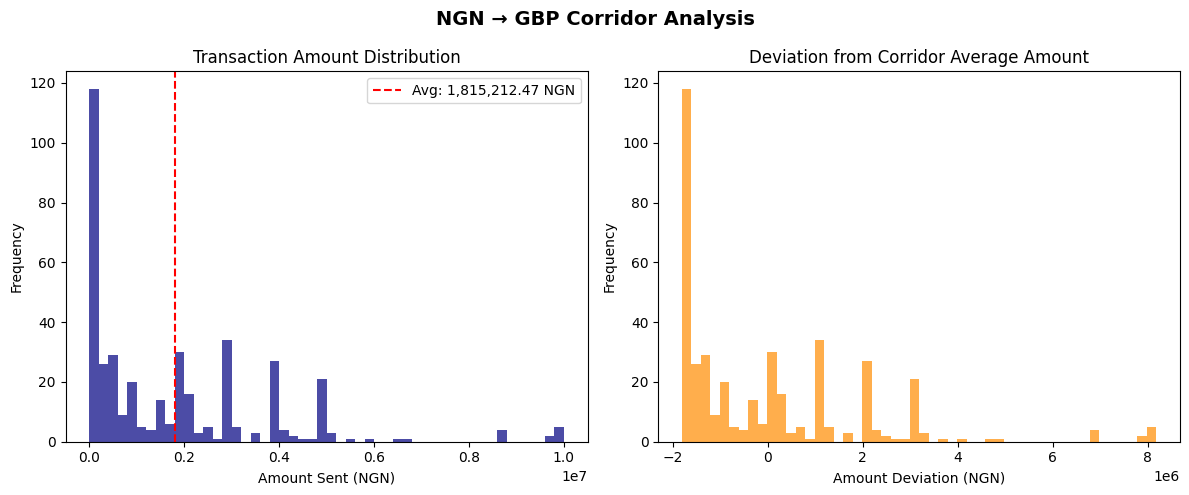


--- GBP → NGN Corridor Insights ---
Average Amount: 152.61 GBP


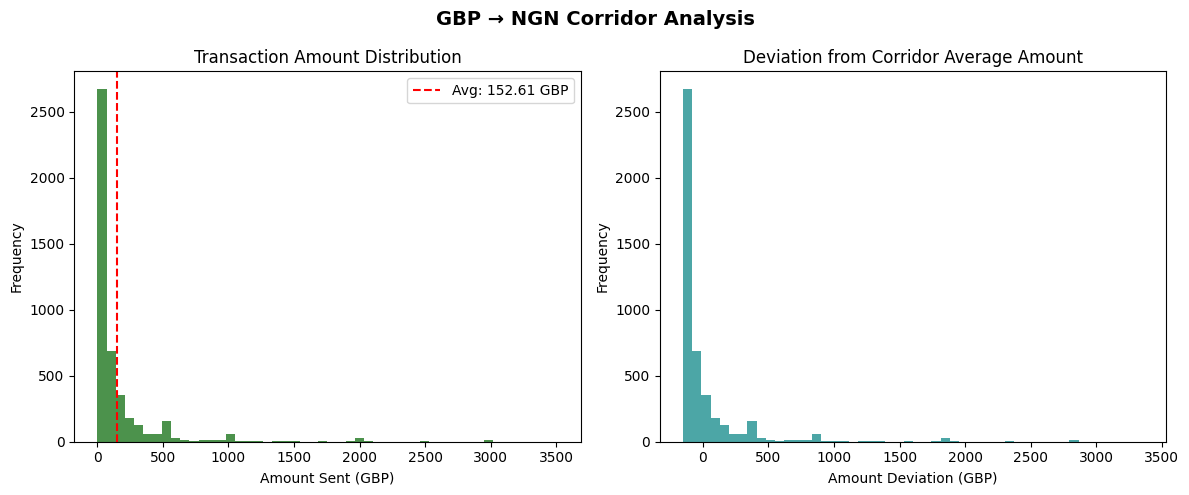

In [21]:
def analyze_corridor_specific_patterns(df1):
    """
    Analyzes transaction patterns for specific currency corridors (NGN-GBP and GBP-NGN) and adds a
    corridor-specific anomaly feature to the DataFrame.
    """
    print("\n" + "=" * 60)
    print("CORRIDOR-SPECIFIC PATTERN ANALYSIS (NGN <-> GBP)")
    print("=" * 60)

    #Calculate average amount for all currency pairs first
    currency_avg_amounts = df1.groupby('currency_pair')['amount_sent'].transform('mean')
    df1['corridor_avg_amount'] = currency_avg_amounts

    # Create a new feature for the deviation from the corridor average
    df1['corridor_amount_deviation'] = df1['amount_sent'] - df1['corridor_avg_amount']


    # Filter for the two main corridors for plotting and specific insights
    df_ngn_gbp = df1[df1['currency_pair'] == 'NGN → GBP'].copy()
    df_gbp_ngn = df1[df1['currency_pair'] == 'GBP → NGN'].copy()

    # NGN -> GBP Analysis
    if not df_ngn_gbp.empty:
        # Calculate corridor-specific stats for NGN -> GBP
        ngn_gbp_avg_amount = df_ngn_gbp['amount_sent'].mean()

        print("\n--- NGN → GBP Corridor Insights ---")
        print(f"Average Amount: {ngn_gbp_avg_amount:,.2f} NGN")

        # Visualize NGN -> GBP corridor
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle('NGN → GBP Corridor Analysis', fontsize=14, fontweight='bold')

        # Amount distribution
        axes[0].hist(df_ngn_gbp['amount_sent'], bins=50, alpha=0.7, color='navy')
        axes[0].axvline(ngn_gbp_avg_amount, color='red', linestyle='--', label=f'Avg: {ngn_gbp_avg_amount:,.2f} NGN')
        axes[0].set_title('Transaction Amount Distribution')
        axes[0].set_xlabel('Amount Sent (NGN)')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()

        # Deviation from average
        axes[1].hist(df_ngn_gbp['corridor_amount_deviation'], bins=50, alpha=0.7, color='darkorange')
        axes[1].set_title('Deviation from Corridor Average Amount')
        axes[1].set_xlabel('Amount Deviation (NGN)')
        axes[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    # GBP -> NGN Analysis
    if not df_gbp_ngn.empty:
        # Calculate corridor-specific stats for GBP -> NGN
        gbp_ngn_avg_amount = df_gbp_ngn['amount_sent'].mean()

        print("\n--- GBP → NGN Corridor Insights ---")
        print(f"Average Amount: {gbp_ngn_avg_amount:,.2f} GBP")

        # Visualize GBP -> NGN corridor
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle('GBP → NGN Corridor Analysis', fontsize=14, fontweight='bold')

        # Amount distribution
        axes[0].hist(df_gbp_ngn['amount_sent'], bins=50, alpha=0.7, color='darkgreen')
        axes[0].axvline(gbp_ngn_avg_amount, color='red', linestyle='--', label=f'Avg: {gbp_ngn_avg_amount:,.2f} GBP')
        axes[0].set_title('Transaction Amount Distribution')
        axes[0].set_xlabel('Amount Sent (GBP)')
        axes[0].set_ylabel('Frequency')
        axes[0].legend()

        # Deviation from average
        axes[1].hist(df_gbp_ngn['corridor_amount_deviation'], bins=50, alpha=0.7, color='teal')
        axes[1].set_title('Deviation from Corridor Average Amount')
        axes[1].set_xlabel('Amount Deviation (GBP)')
        axes[1].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    return df1

analyze_corridor_specific_patterns(df1);

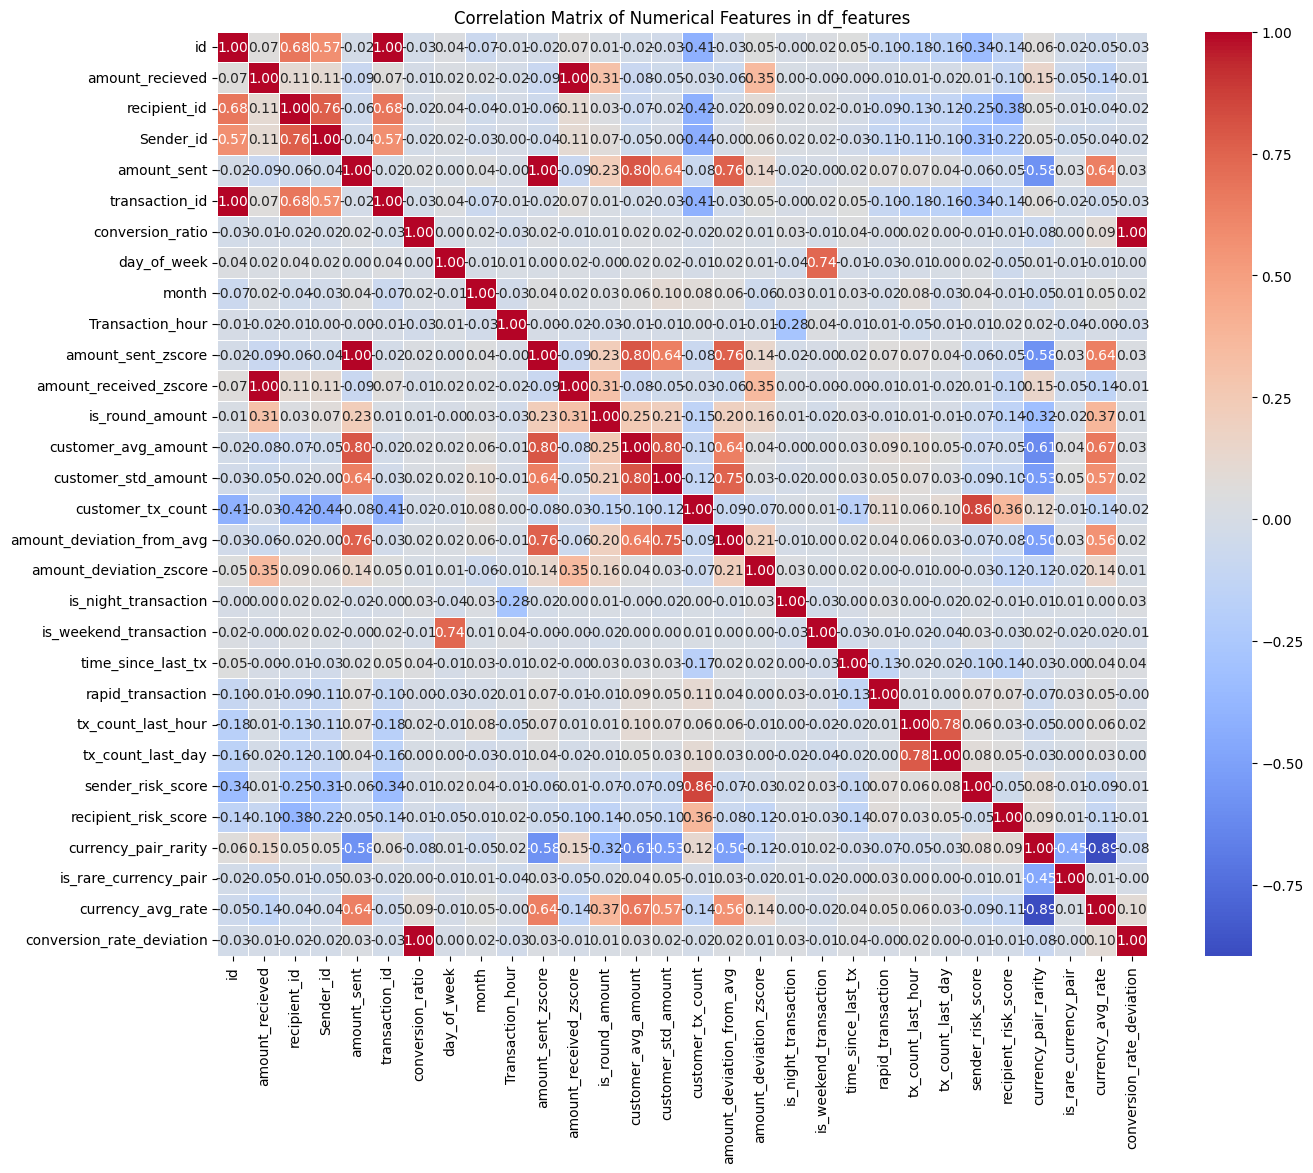

In [22]:
# Select only numerical columns for the correlation matrix
df_features_numeric = df_features.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_features_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features in df_features')
plt.show()

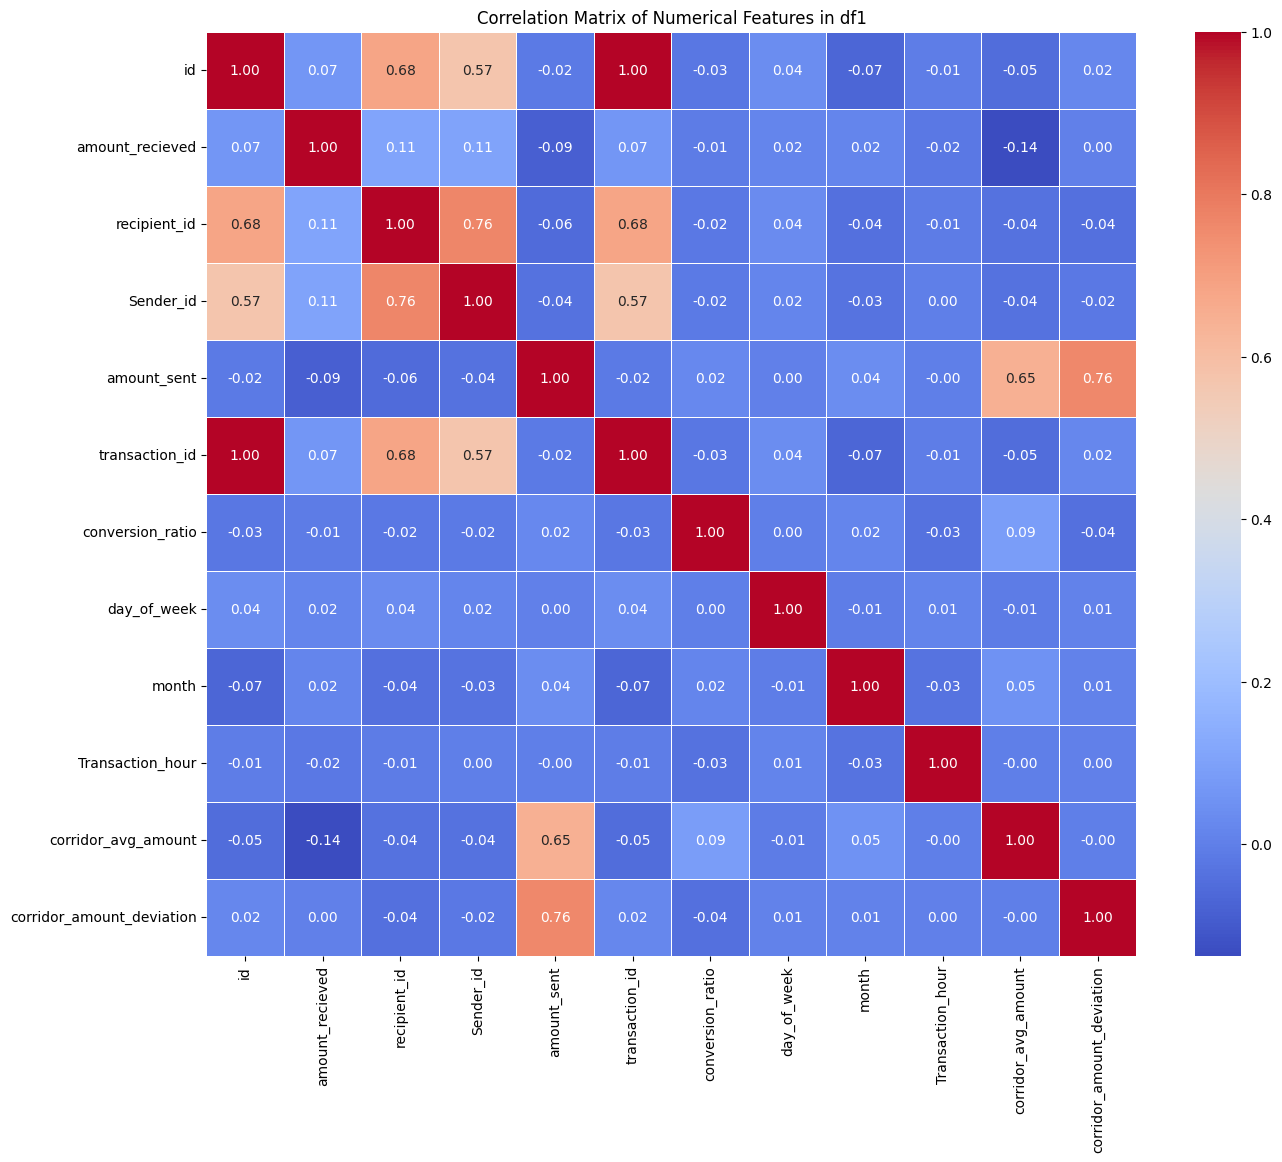

In [23]:
# Select only numerical columns for the correlation matrix
df1_numeric = df1.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df1_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features in df1')
plt.show()

In [24]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5012 non-null   int64         
 1   amount_recieved            5012 non-null   float64       
 2   Transaction_Created_At     5012 non-null   datetime64[ns]
 3   updated_at                 5012 non-null   datetime64[ns]
 4   recipient_id               5012 non-null   int64         
 5   Sender_id                  5012 non-null   int64         
 6   receive_currency           5012 non-null   object        
 7   send_currency              5012 non-null   object        
 8   amount_sent                5012 non-null   float64       
 9   Transaction_Status         5012 non-null   object        
 10  transaction_id             5012 non-null   int64         
 11  conversion_ratio           5012 non-null   float64       
 12  date  

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5012 entries, 0 to 5756
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5012 non-null   int64         
 1   amount_recieved            5012 non-null   float64       
 2   Transaction_Created_At     5012 non-null   datetime64[ns]
 3   updated_at                 5012 non-null   datetime64[ns]
 4   recipient_id               5012 non-null   int64         
 5   Sender_id                  5012 non-null   int64         
 6   receive_currency           5012 non-null   object        
 7   send_currency              5012 non-null   object        
 8   amount_sent                5012 non-null   float64       
 9   Transaction_Status         5012 non-null   object        
 10  transaction_id             5012 non-null   int64         
 11  conversion_ratio           5012 non-null   float64       
 12  date       

In [26]:
# Identify columns in df1 that are not in df_features (excluding the merge key 'id')
unique_cols_df1 = [col for col in df1.columns if col not in df_features.columns and col != 'id']

# Create a subset of df1 with only the unique columns and the merge key
df1_subset = df1[['id'] + unique_cols_df1]

# Merge df_features with the subset of df1 based on 'id'
final_df = pd.merge(df_features, df1_subset, on='id', how='inner')

# Display the head of the merged dataframe

display(final_df.head)

# Display the info of the merged dataframe to check the columns and data types

final_df.info()

<bound method NDFrame.head of          id  amount_recieved Transaction_Created_At          updated_at  \
0      1076             2.24    2024-09-08 20:10:03 2024-09-08 20:10:03   
1      1104             2.24    2024-09-12 18:50:06 2024-09-12 18:50:06   
2      1230          6648.00    2024-10-24 19:47:06 2024-10-24 19:47:06   
3      1236          6648.00    2024-10-25 10:42:16 2024-10-25 10:42:16   
4      1237             4.39    2024-10-25 10:45:03 2024-10-25 10:45:03   
...     ...              ...                    ...                 ...   
5007  22455         90006.00    2025-06-09 08:44:52 2025-06-09 08:44:52   
5008  22369           200.00    2025-06-07 07:31:45 2025-06-07 07:31:45   
5009  22400           200.00    2025-06-07 14:31:03 2025-06-07 14:31:03   
5010  22337          2147.00    2025-06-06 13:21:34 2025-06-06 13:21:34   
5011  22471         85880.00    2025-06-09 14:03:06 2025-06-09 14:03:06   

      recipient_id  Sender_id receive_currency send_currency  amount_sent  \
0              373        334              GBP           NGN      5000.00   
1              373        334              GBP           NGN      5000.00   
2              604        334              NGN           GBP         3.00   
3              604        334              NGN           GBP         3.00   
4              373        334              GBP           NGN     10000.00   
...            ...        ...              ...           ...          ...   
5007          9986       7768              NGN           GBP        42.00   
5008         10005       7770              GBP           NGN    430799.96   
5009         10005       7770              GBP           NGN    430799.96   
5010         10006       7771              NGN           GBP         1.00   
5011         10006       7771              NGN           GBP        40.00   

     Transaction_Status  ...  tx_count_last_hour  tx_count_last_day  \
0            Successful  ...                 1.0                1.0   
1             Cancelled  ...                 1.0                1.0   
2            Successful  ...                 1.0                1.0   
3            Successful  ...                 1.0                1.0   
4            Successful  ...                 1.0                1.0   
...                 ...  ...                 ...                ...   
5007         Successful  ...                 1.0                2.0   
5008          Cancelled  ...                 1.0                1.0   
5009          Cancelled  ...                 1.0                1.0   
5010         Successful  ...                 1.0                1.0   
5011         Successful  ...                 1.0                1.0   

     sender_risk_score  recipient_risk_score currency_pair_rarity  \
0                0.480                 0.004                  402   
1                0.480                 0.004                  402   
2                0.480                 0.004                 4514   
3                0.480                 0.004                 4514   
4                0.480                 0.004                  402   
...                ...                   ...                  ...   
5007             0.002                 0.002                 4514   
5008             0.002                 0.002                  402   
5009             0.002                 0.002                  402   
5010             0.002                 0.002                 4514   
5011             0.002                 0.002                 4514   

      is_rare_currency_pair  currency_avg_rate  conversion_rate_deviation  \
0                         0        4589.546285                2357.404424   
1                         0        4589.546285                2357.404424   
2                         0           0.000481                   0.000030   
3                         0           0.000481                   0.000030   
4                         0        4589.546285                2311.642476   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         5012 non-null   int64         
 1   amount_recieved            5012 non-null   float64       
 2   Transaction_Created_At     5012 non-null   datetime64[ns]
 3   updated_at                 5012 non-null   datetime64[ns]
 4   recipient_id               5012 non-null   int64         
 5   Sender_id                  5012 non-null   int64         
 6   receive_currency           5012 non-null   object        
 7   send_currency              5012 non-null   object        
 8   amount_sent                5012 non-null   float64       
 9   Transaction_Status         5012 non-null   object        
 10  transaction_id             5012 non-null   int64         
 11  conversion_ratio           5012 non-null   float64       
 12  date  

# Model Building

## Model Selection

To ensure a robust and comprehensive analysis, a comparison of multiple unsupervised machine learning models will be conducted. The selection of these models is informed by the existing literature on financial fraud detection, which highlights the importance of unsupervised anomaly detection when ground truth labels are unavailable. The primary models selected for this task are:

*   **Isolation Forest:** A tree-based ensemble model particularly effective at isolating abnormal data points without requiring a predefined distance metric. It works by randomly partitioning data and is highly efficient at identifying outliers.
*   **Local Outlier Factor (LOF):** A density-based model that measures the local deviation of a data point from its neighbors. It is well-suited for datasets with varying densities and can identify outliers that are not globally distant but are locally anomalous.
*   **One-Class SVM:** A kernel-based method that learns a decision boundary to separate the "normal" data points from the origin. It is useful for high-dimensional data and can identify outliers that fall outside this learned boundary.

The performance of each model will be assessed to determine which is most effective at identifying anomalies in the context of this specific dataset.

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Task
Compare the performance of Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM anomaly detection models on three different datasets: a baseline dataset (`df`), a dataset with general engineered features (`df_features`), and a final merged dataset (`final_df`) containing features from both. Identify the best performing dataset and model combination based on the anomaly detection results.

## Define feature sets

### Subtask:
Define the feature sets for the baseline dataset (`df`), the dataset with general engineered features (`df_features`), and the final merged dataset (`final_df`).


In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Create a copy of df for modeling
df_baseline_model = df.copy()

# Define features for the original df (numerical columns)
# Using the baseline_features list defined previously
baseline_features = [
    'amount_recieved',
    'amount_sent'
]

# Filter to include only features present in df_baseline_model
baseline_features = [col for col in baseline_features if col in df_baseline_model.columns]


# Select the features and handle potential non-numeric types and missing values
X_df = df_baseline_model[baseline_features].copy()
X_df = X_df.select_dtypes(include=np.number).fillna(X_df.select_dtypes(include=np.number).mean())

print("Features used for modeling on original df:", X_df.columns.tolist())
print("Shape of feature matrix for original df:", X_df.shape)


# --- Train Isolation Forest on original df ---
print("\n--- Training Isolation Forest on original df ---")
pipeline_if_df = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(contamination=0.01, random_state=42))
])
df_baseline_model['if_anomaly_df'] = pipeline_if_df.fit_predict(X_df)
df_baseline_model['if_anomaly_df'] = df_baseline_model['if_anomaly_df'].map({1: 'Normal', -1: 'Anomaly'})
print(f"Isolation Forest anomalies (original df): {(df_baseline_model['if_anomaly_df'] == 'Anomaly').sum()}")

# --- Train Local Outlier Factor (LOF) on original df ---
print("\n--- Training Local Outlier Factor (LOF) on original df ---")
pipeline_lof_df = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=False))
])
df_baseline_model['lof_anomaly_df'] = pipeline_lof_df.fit_predict(X_df)
df_baseline_model['lof_anomaly_df'] = df_baseline_model['lof_anomaly_df'].map({1: 'Normal', -1: 'Anomaly'})
print(f"LOF anomalies (original df): {(df_baseline_model['lof_anomaly_df'] == 'Anomaly').sum()}")

# --- Train One-Class SVM on original df ---
print("\n--- Training One-Class SVM on original df ---")
pipeline_svm_df = Pipeline([
    ('scaler', StandardScaler()),
    ('model', OneClassSVM(nu=0.01, kernel='rbf', gamma='auto'))
])
df_baseline_model['svm_anomaly_df'] = pipeline_svm_df.fit_predict(X_df)
df_baseline_model['svm_anomaly_df'] = df_baseline_model['svm_anomaly_df'].map({1: 'Normal', -1: 'Anomaly'})
print(f"One-Class SVM anomalies (original df): {(df_baseline_model['svm_anomaly_df'] == 'Anomaly').sum()}")


# Display the head of df_baseline_model with anomaly predictions
display(df_baseline_model.head())

Features used for modeling on original df: ['amount_recieved', 'amount_sent']
Shape of feature matrix for original df: (5012, 2)

--- Training Isolation Forest on original df ---
Isolation Forest anomalies (original df): 50

--- Training Local Outlier Factor (LOF) on original df ---
LOF anomalies (original df): 51

--- Training One-Class SVM on original df ---
One-Class SVM anomalies (original df): 95


,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,transaction_id,if_anomaly_df,lof_anomaly_df,svm_anomaly_df
0,18831,39950.00,2025-03-23 15:19:36,2025-03-23 15:19:36,3538,1780,NGN,EUR,23.5,Cancelled,18850,Normal,Normal,Normal
1,18860,10075.00,2025-03-24 08:24:46,2025-03-24 08:24:46,3142,2764,NGN,GBP,5.0,Successful,18879,Normal,Normal,Normal
2,696,1.00,2024-07-10 15:18:37,2024-07-10 15:18:37,359,495,GBP,NGN,2000.0,Cancelled,659,Normal,Normal,Normal
5,18883,2.45,2025-03-24 15:10:14,2025-03-24 15:10:14,6409,5864,GBP,NGN,5000.0,Successful,18902,Normal,Normal,Normal
6,18902,403000.00,2025-03-25 07:41:12,2025-03-25 07:41:12,786,983,NGN,GBP,200.0,Successful,18921,Normal,Normal,Normal


In [38]:
# Create a copy of the dataframe with the engineered features
df_model = df_features.copy()

# Select the features for the model
features = [
    'amount_sent_zscore', 'amount_received_zscore', 'amount_deviation_zscore',
    'is_round_amount', 'is_night_transaction', 'is_weekend_transaction',
    'rapid_transaction', 'tx_count_last_hour',
    'tx_count_last_day', 'sender_risk_score', 'recipient_risk_score',
    'currency_pair_rarity', 'conversion_rate_deviation', 'is_rare_currency_pair'
]

# Create a new dataframe with the selected features
X = df_model[features]

# Impute missing values with the mean
X = X.fillna(X.mean())

# Create a pipeline for each model
# Isolation Forest
pipeline_if = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(contamination=0.01, random_state=42))
])

# Local Outlier Factor
# Changed novelty=True to novelty=False and will use fit() followed by predict()
pipeline_lof = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=False))
])

# One-Class SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', OneClassSVM(nu=0.01, kernel='rbf', gamma='auto'))
])

# Fit the pipelines and get the anomaly scores
df_model['if_anomaly'] = pipeline_if.fit_predict(X)

# For Local Outlier Factor with novelty=False, use fit and then predict
df_model['lof_anomaly'] = pipeline_lof.fit_predict(X)

df_model['svm_anomaly'] = pipeline_svm.fit_predict(X)

# Convert the anomaly scores to a more readable format
df_model['if_anomaly'] = df_model['if_anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df_model['lof_anomaly'] = df_model['lof_anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df_model['svm_anomaly'] = df_model['svm_anomaly'].map({1: 'Normal', -1: 'Anomaly'})


# --- Train Isolation Forest on final_df ---
print("Number of anomalies detected by Isolation Forest:", (df_model['if_anomaly'] == 'Anomaly').sum())

# --- Train Local Outlier Factor on final_df ---
print("Number of anomalies detected by Local Outlier Factor:", (df_model['lof_anomaly'] == 'Anomaly').sum())

# --- Train One-Class SVM on final_df ---
print("Number of anomalies detected by One-Class SVM:", (df_model['svm_anomaly'] == 'Anomaly').sum())

# Display the first few rows of the dataframe with the anomaly scores
display(df_model.head())

Number of anomalies detected by Isolation Forest: 51
Number of anomalies detected by Local Outlier Factor: 51
Number of anomalies detected by One-Class SVM: 109


,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,...,tx_count_last_day,sender_risk_score,recipient_risk_score,currency_pair_rarity,is_rare_currency_pair,currency_avg_rate,conversion_rate_deviation,if_anomaly,lof_anomaly,svm_anomaly
0,1076,2.24,2024-09-08 20:10:03,2024-09-08 20:10:03,373,334,GBP,NGN,5000.0,Successful,...,1.0,0.48,0.004,402,0,4589.546285,2357.404424,Normal,Normal,Normal
1,1104,2.24,2024-09-12 18:50:06,2024-09-12 18:50:06,373,334,GBP,NGN,5000.0,Cancelled,...,1.0,0.48,0.004,402,0,4589.546285,2357.404424,Normal,Normal,Normal
2,1230,6648.00,2024-10-24 19:47:06,2024-10-24 19:47:06,604,334,NGN,GBP,3.0,Successful,...,1.0,0.48,0.004,4514,0,0.000481,0.000030,Normal,Normal,Normal
3,1236,6648.00,2024-10-25 10:42:16,2024-10-25 10:42:16,604,334,NGN,GBP,3.0,Successful,...,1.0,0.48,0.004,4514,0,0.000481,0.000030,Normal,Normal,Normal
4,1237,4.39,2024-10-25 10:45:03,2024-10-25 10:45:03,373,334,GBP,NGN,10000.0,Successful,...,1.0,0.48,0.004,402,0,4589.546285,2311.642476,Normal,Normal,Normal


In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Create a copy of final_df (our final_df) for modeling
df_regional_model = final_df.copy()

regional_engineered_features = [
    'amount_sent_zscore',
    'amount_received_zscore',
    'amount_deviation_zscore',
    'is_round_amount',
    'is_night_transaction',
    'is_weekend_transaction',
    'rapid_transaction',
    'tx_count_last_hour',
    'tx_count_last_day',
    'sender_risk_score',
    'recipient_risk_score',
    'currency_pair_rarity',
    'conversion_rate_deviation',
    'is_rare_currency_pair',
    'corridor_avg_amount',
    'corridor_amount_deviation'
]

regional_engineered_features = [col for col in regional_engineered_features if col in df_regional_model.columns]


# Select the features and handle potential non-numeric types and missing values
X_regional = df_regional_model[regional_engineered_features].copy()
X_regional = X_regional.select_dtypes(include=np.number).fillna(X_regional.select_dtypes(include=np.number).mean())

print("Features used for modeling on final_df:", X_regional.columns.tolist())
print("Shape of feature matrix for final_df:", X_regional.shape)


# --- Train Isolation Forest on final_df ---
print("\n--- Training Isolation Forest on final_df ---")
pipeline_if_regional = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(contamination=0.01, random_state=42))
])
df_regional_model['if_anomaly_regional'] = pipeline_if_regional.fit_predict(X_regional)
df_regional_model['if_anomaly_regional'] = df_regional_model['if_anomaly_regional'].map({1: 'Normal', -1: 'Anomaly'})
print(f"Isolation Forest anomalies (final_df): {(df_regional_model['if_anomaly_regional'] == 'Anomaly').sum()} anomalies")

# --- Train Local Outlier Factor (LOF) on final_df ---
print("\n--- Training Local Outlier Factor (LOF) on final_df ---")
pipeline_lof_regional = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=False))
])
df_regional_model['lof_anomaly_regional'] = pipeline_lof_regional.fit_predict(X_regional)
df_regional_model['lof_anomaly_regional'] = df_regional_model['lof_anomaly_regional'].map({1: 'Normal', -1: 'Anomaly'})
print(f"LOF anomalies (final_df): {(df_regional_model['lof_anomaly_regional'] == 'Anomaly').sum()} anomalies")

# --- Train One-Class SVM on final_df ---
print("\n--- Training One-Class SVM on final_df ---")
pipeline_svm_regional = Pipeline([
    ('scaler', StandardScaler()),
    ('model', OneClassSVM(nu=0.01, kernel='rbf', gamma='auto'))
])
df_regional_model['svm_anomaly_regional'] = pipeline_svm_regional.fit_predict(X_regional)
df_regional_model['svm_anomaly_regional'] = df_regional_model['svm_anomaly_regional'].map({1: 'Normal', -1: 'Anomaly'})
print(f"One-Class SVM anomalies (final_df): {(df_regional_model['svm_anomaly_regional'] == 'Anomaly').sum()} anomalies")

# Display the head of df_regional_model with anomaly predictions
display(df_regional_model.head())

Features used for modeling on final_df: ['amount_sent_zscore', 'amount_received_zscore', 'amount_deviation_zscore', 'is_round_amount', 'is_night_transaction', 'is_weekend_transaction', 'rapid_transaction', 'tx_count_last_hour', 'tx_count_last_day', 'sender_risk_score', 'recipient_risk_score', 'currency_pair_rarity', 'conversion_rate_deviation', 'is_rare_currency_pair', 'corridor_avg_amount', 'corridor_amount_deviation']
Shape of feature matrix for final_df: (5012, 16)

--- Training Isolation Forest on final_df ---
Isolation Forest anomalies (final_df): 51 anomalies

--- Training Local Outlier Factor (LOF) on final_df ---
LOF anomalies (final_df): 51 anomalies

--- Training One-Class SVM on final_df ---
One-Class SVM anomalies (final_df): 110 anomalies


,id,amount_recieved,Transaction_Created_At,updated_at,recipient_id,Sender_id,receive_currency,send_currency,amount_sent,Transaction_Status,...,recipient_risk_score,currency_pair_rarity,is_rare_currency_pair,currency_avg_rate,conversion_rate_deviation,corridor_avg_amount,corridor_amount_deviation,if_anomaly_regional,lof_anomaly_regional,svm_anomaly_regional
0,1076,2.24,2024-09-08 20:10:03,2024-09-08 20:10:03,373,334,GBP,NGN,5000.0,Successful,...,0.004,402,0,4589.546285,2357.404424,1.815212e+06,-1.810212e+06,Normal,Normal,Normal
1,1104,2.24,2024-09-12 18:50:06,2024-09-12 18:50:06,373,334,GBP,NGN,5000.0,Cancelled,...,0.004,402,0,4589.546285,2357.404424,1.815212e+06,-1.810212e+06,Normal,Normal,Normal
2,1230,6648.00,2024-10-24 19:47:06,2024-10-24 19:47:06,604,334,NGN,GBP,3.0,Successful,...,0.004,4514,0,0.000481,0.000030,1.526093e+02,-1.496093e+02,Normal,Normal,Normal
3,1236,6648.00,2024-10-25 10:42:16,2024-10-25 10:42:16,604,334,NGN,GBP,3.0,Successful,...,0.004,4514,0,0.000481,0.000030,1.526093e+02,-1.496093e+02,Normal,Normal,Normal
4,1237,4.39,2024-10-25 10:45:03,2024-10-25 10:45:03,373,334,GBP,NGN,10000.0,Successful,...,0.004,402,0,4589.546285,2311.642476,1.815212e+06,-1.805212e+06,Normal,Anomaly,Normal


My next step is to establish a performance benchmark for the anomaly detection system.

By analyzing the anomalies detected using only the most basic features, a baseline will be created against which analysis will be compared. The output will be used to determine whether the feature engineering efforts led to a measurable improvement in anomaly detection.

In [35]:
# Assuming your baseline results are in the 'df_baseline_model' DataFrame
# You need to add score columns to this DataFrame for sorting
df_baseline_model['if_score_df'] = pipeline_if_df.decision_function(X_df)
df_baseline_model['lof_score_df'] = pipeline_lof_df['model'].negative_outlier_factor_
df_baseline_model['svm_score_df'] = pipeline_svm_df.decision_function(X_df)

print("\n--- BASELINE MODEL ANOMALY ANALYSIS ---")

# Analyze Isolation Forest Anomalies
print("\n>>> Isolation Forest on Baseline Features:")
baseline_if_anomalies = df_baseline_model[df_baseline_model['if_anomaly_df'] == 'Anomaly']
print(f"Number of anomalies: {len(baseline_if_anomalies)}")
print("Average amount_sent for anomalies:", baseline_if_anomalies['amount_sent'].mean())

# Analyze LOF Anomalies
print("\n>>> LOF on Baseline Features:")
baseline_lof_anomalies = df_baseline_model[df_baseline_model['lof_anomaly_df'] == 'Anomaly']
print(f"Number of anomalies: {len(baseline_lof_anomalies)}")
print("Average amount_sent for anomalies:", baseline_lof_anomalies['amount_sent'].mean())

# Analyze One-Class SVM Anomalies
print("\n>>> One-Class SVM on Baseline Features:")
baseline_svm_anomalies = df_baseline_model[df_baseline_model['svm_anomaly_df'] == 'Anomaly']
print(f"Number of anomalies: {len(baseline_svm_anomalies)}")
print("Average amount_sent for anomalies:", baseline_svm_anomalies['amount_sent'].mean())


--- BASELINE MODEL ANOMALY ANALYSIS ---

>>> Isolation Forest on Baseline Features:
Number of anomalies: 50
Average amount_sent for anomalies: 3586749.1817999994

>>> LOF on Baseline Features:
Number of anomalies: 51
Average amount_sent for anomalies: 1727475.9321568622

>>> One-Class SVM on Baseline Features:
Number of anomalies: 95
Average amount_sent for anomalies: 1300439.029368421


We will now be measuring the impact of the general feature engineered dataset.

Having established a performance baseline, this step shows the value of the non-regional engineered features created. By running the same three models on this richer dataset, I can analyze how the models' anomaly detection capabilities have changed. The outputs here will be compared to the baseline to show the measurable improvement gained from the general feature engineering efforts.

In [36]:
# Assuming your general results are in the 'df_model' DataFrame
# You need to add score columns to this DataFrame for sorting
pipeline_if.fit(X)
df_model['if_score'] = pipeline_if.decision_function(X)
pipeline_lof.fit(X)
df_model['lof_score'] = pipeline_lof['model'].negative_outlier_factor_
pipeline_svm.fit(X)
df_model['svm_score'] = pipeline_svm.decision_function(X)

print("\n--- GENERAL ENGINEERED MODEL ANOMALY ANALYSIS ---")

# Analyze Isolation Forest Anomalies
print("\n>>> Isolation Forest on General Features:")
general_if_anomalies = df_model[df_model['if_anomaly'] == 'Anomaly']
print(f"Number of anomalies: {len(general_if_anomalies)}")
print("Average amount_deviation_zscore for anomalies:", general_if_anomalies['amount_deviation_zscore'].mean())
print("Average sender_risk_score for anomalies:", general_if_anomalies['sender_risk_score'].mean())
# You can add more features here...

# Analyze LOF Anomalies
print("\n>>> LOF on General Features:")
general_lof_anomalies = df_model[df_model['lof_anomaly'] == 'Anomaly']
print(f"Number of anomalies: {len(general_lof_anomalies)}")
print("Average amount_deviation_zscore for anomalies:", general_lof_anomalies['amount_deviation_zscore'].mean())
print("Average sender_risk_score for anomalies:", general_lof_anomalies['sender_risk_score'].mean())

# Analyze One-Class SVM Anomalies
print("\n>>> One-Class SVM on General Features:")
general_svm_anomalies = df_model[df_model['svm_anomaly'] == 'Anomaly']
print(f"Number of anomalies: {len(general_svm_anomalies)}")
print("Average amount_deviation_zscore for anomalies:", general_svm_anomalies['amount_deviation_zscore'].mean())
print("Average sender_risk_score for anomalies:", general_svm_anomalies['sender_risk_score'].mean())


--- GENERAL ENGINEERED MODEL ANOMALY ANALYSIS ---

>>> Isolation Forest on General Features:
Number of anomalies: 51
Average amount_deviation_zscore for anomalies: 1.6039302231132586
Average sender_risk_score for anomalies: 3.8963529411764712

>>> LOF on General Features:
Number of anomalies: 51
Average amount_deviation_zscore for anomalies: 0.46558639074308833
Average sender_risk_score for anomalies: 6.001803921568628

>>> One-Class SVM on General Features:
Number of anomalies: 109
Average amount_deviation_zscore for anomalies: 1.416207649564247
Average sender_risk_score for anomalies: 8.71751376146789


The most critical part of the analysis: proving the core hypothesis f my dissertation.

By running the models on a dataset that includes the "corridor_amount_deviation" feature, the change in anomaly detection can bee seen.

The output will provide the evidence to answer the research question. Specifically, I'll be able to:

Quantify the impact: I'll be able to see if the regional features led to a measurable increase in the number of anomalies.

Qualify the impact: More importantly, I'll be able to identify and inspect the unique anomalies that were found only by the regional models. By analyzing these transactions, I can prove that my regional features were effective in detecting subtle, context-specific fraudulent behavior that a generic model would have missed.

In [37]:
# Assuming your regional results are in the 'df_regional_model' DataFrame
# You need to add score columns to this DataFrame for sorting
df_regional_model['if_score_regional'] = pipeline_if_regional.decision_function(X_regional)
df_regional_model['lof_score_regional'] = pipeline_lof_regional['model'].negative_outlier_factor_
df_regional_model['svm_score_regional'] = pipeline_svm_regional.decision_function(X_regional)

print("\n--- REGIONAL ENGINEERED MODEL ANOMALY ANALYSIS ---")

# Analyze Isolation Forest Anomalies
print("\n>>> Isolation Forest on Regional Features:")
regional_if_anomalies = df_regional_model[df_regional_model['if_anomaly_regional'] == 'Anomaly']
print(f"Number of anomalies: {len(regional_if_anomalies)}")
print("Average corridor_amount_deviation for anomalies:", regional_if_anomalies['corridor_amount_deviation'].mean())

# Find unique anomalies (found by regional but not by general)
unique_regional_if = regional_if_anomalies[~regional_if_anomalies.index.isin(general_if_anomalies.index)]
print(f"Number of UNIQUE anomalies vs General model: {len(unique_regional_if)}")
print("Average corridor_amount_deviation for UNIQUE anomalies:", unique_regional_if['corridor_amount_deviation'].mean())
# You can do the same for LOF and One-Class SVM...

# Now inspect the features of these unique anomalies
if not unique_regional_if.empty:
    print("\n--- Top 5 Unique Anomalies (Regional Isolation Forest) ---")
    top_5_unique = unique_regional_if.sort_values(by='if_score_regional')
    print(top_5_unique[[
        'Sender_id',
        'amount_sent',
        'currency_pair',
        'corridor_amount_deviation',
        'sender_risk_score',
        'if_score_regional'
    ]])

# --- LOF ANALYSIS ---
print("\n>>> LOF on Regional Features:")
regional_lof_anomalies = df_regional_model[df_regional_model['lof_anomaly_regional'] == 'Anomaly']
print(f"Number of anomalies: {len(regional_lof_anomalies):,}")
print("Average corridor_amount_deviation for anomalies:", regional_lof_anomalies['corridor_amount_deviation'].mean())

# Find unique anomalies (found by regional but not by general)
unique_regional_lof = regional_lof_anomalies[~regional_lof_anomalies.index.isin(general_lof_anomalies.index)]
print(f"Number of UNIQUE anomalies vs General model: {len(unique_regional_lof):,}")
print("Average corridor_amount_deviation for UNIQUE anomalies:", unique_regional_lof['corridor_amount_deviation'].mean())

# Now inspect the features of these unique anomalies
if not unique_regional_lof.empty:
    print("\n--- Top 5 Unique Anomalies (Regional LOF) ---")
    # Remember LOF scores are negative_outlier_factor_, so a higher negative value is more anomalous
    top_5_unique_lof = unique_regional_lof.sort_values(by='lof_score_regional')
    print(top_5_unique_lof[[
        'Sender_id',
        'amount_sent',
        'currency_pair',
        'corridor_amount_deviation',
        'sender_risk_score',
        'lof_score_regional'
    ]])


# --- ONE-CLASS SVM ANALYSIS ---
print("\n>>> One-Class SVM on Regional Features:")
regional_svm_anomalies = df_regional_model[df_regional_model['svm_anomaly_regional'] == 'Anomaly']
print(f"Number of anomalies: {len(regional_svm_anomalies):,}")
print("Average corridor_amount_deviation for anomalies:", regional_svm_anomalies['corridor_amount_deviation'].mean())

# Find unique anomalies (found by regional but not by general)
unique_regional_svm = regional_svm_anomalies[~regional_svm_anomalies.index.isin(general_svm_anomalies.index)]
print(f"Number of UNIQUE anomalies vs General model: {len(unique_regional_svm):,}")
print("Average corridor_amount_deviation for UNIQUE anomalies:", unique_regional_svm['corridor_amount_deviation'].mean())

# Now inspect the features of these unique anomalies
if not unique_regional_svm.empty:
    print("\n--- Top 5 Unique Anomalies (Regional One-Class SVM) ---")
    top_5_unique_svm = unique_regional_svm.sort_values(by='svm_score_regional')
    print(top_5_unique_svm[[
        'Sender_id',
        'amount_sent',
        'currency_pair',
        'corridor_amount_deviation',
        'sender_risk_score',
        'svm_score_regional'
    ]])


--- REGIONAL ENGINEERED MODEL ANOMALY ANALYSIS ---

>>> Isolation Forest on Regional Features:
Number of anomalies: 51
Average corridor_amount_deviation for anomalies: 1952009.962127728
Number of UNIQUE anomalies vs General model: 12
Average corridor_amount_deviation for UNIQUE anomalies: 2665806.9126613718

--- Top 5 Unique Anomalies (Regional Isolation Forest) ---
      Sender_id  amount_sent currency_pair  corridor_amount_deviation  \
4309       7354   8687999.18     NGN → GBP               6.872787e+06   
2078       1906   1588410.05     NGN → USD              -1.045908e+05   
2018       1781   3000000.00     NGN → GBP               1.184788e+06   
1090        889   2900000.00     NGN → GBP               1.084788e+06   
2036       1781   4000000.00     NGN → GBP               2.184788e+06   
2037       1781   4000000.00     NGN → GBP               2.184788e+06   
2076       1906   1526400.05     NGN → USD              -1.666008e+05   
925         821   9650000.00     NGN → GBP    